Przed oddaniem zadania upewnij się, że wszystko działa poprawnie.
**Uruchom ponownie kernel** (z paska menu: Kernel$\rightarrow$Restart) a następnie
**wykonaj wszystkie komórki** (z paska menu: Cell$\rightarrow$Run All).

Upewnij się, że wypełniłeś wszystkie pola `TU WPISZ KOD` lub `TU WPISZ ODPOWIEDŹ`, oraz
że podałeś swoje imię i nazwisko poniżej:

In [1]:
NAME = "Kamil Matejuk"

---

# Autokodery wariacyjne (*Variational Autoencoders*)

## Autokoder
**Autokoder** (ang. *autoencoder*) to model trenowany w zadaniu rekonstruowania wejścia. Zazwyczaj składa się z dwóch sieci neuronowych:

* **kodera** (funkcji $f(\mathbf{x})$ - kodującego wejście do postaci ukrytej (*latent*) $\mathbf{h} = f(\mathbf{x})$,
* **dekodera** (funkcji $g(\mathbf{h})$ - rekonstruującego wejście $\mathbf{r} = g(\mathbf{h})$.

Innymi słowy, autokoder jest modelem mapującym wejście $\mathbf{x}$ na wyjście $\mathbf{r}$ poprzez jego wewnętrzną, ukrytą reprezentację $\mathbf{h}$.

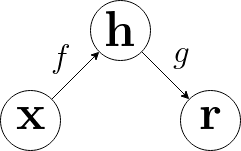

Głównym celem trenowania modelu jest znalezienie najlepszej pary koder-dekoder, która zachowuje maksimum informacji podczas kodowania, co daje najmniejszy **błąd rekonstrukcji** $\mathcal{L}$:

$$(f^*, g^*) = \arg\min\mathcal{L}(\mathbf{x}, g(f(\mathbf{x}))).$$

W przypadku autokoderów często używaną funkcją kosztu jest błąd średniokwadratowy.

Klasyczne autokodery używane są w zwykle w celu redukcji wymiarowości lub wstępnego uczenia cech do modelu. Ze względu na brak wykorzystania etykiet, modele te są trenowane w sposób nienadzorowany.

## Autokoder wariacyjny

Wykorzystanie wyłącznie błędu rekonstrukcji jako funkcji celu w klasycznych autokoderach wymusza na modelu uczenie się skompresowanej reprezentacji danych, jednak często może prowadzić do jego przetrenowania, przez co jego zdolności generatywne są ograniczone (głównie ze względu na nieregularną przestrzeń ukrytą).

Rozwiązaniem pozwalającym na wyuczenie się reprezentacji o wyższej jakości są **autokodery wariacyjne** (ang. *variational autoencoders*). Jest to model generatywny, gdzie zamiast uczenia funkcji kodera mapującej wejście do przestrzeni ukrytej będziemy próbowali uczyć się nieznanego rozkładu danych $p_{\theta^*}(\mathbf{z})$.

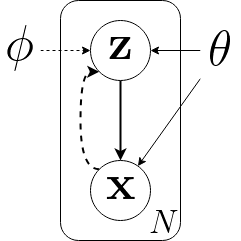

Skupmy się na modelu generatywnym $p_\theta(\mathbf{z})p_\theta(\mathbf{x} | \mathbf{z})$, oznaczonym liniami ciągłymi. Zakładamy, że przykłady ze zbioru danych $\mathbf{X} = \left\{x^{(i)}\right\}_{i=1}^N$, składającego się z $N$ niezależnych i pochodzących z tego samego rozkładu przykładów, generowane są przez proces losowy, w którym występuje nieobserwowana, ciągła zmienna losowa $\mathbf{z}$. Proces ten składa się z dwóch kroków:

1. wektor ukryty $\mathbf{z}^{(i)}$ generowany jest z rozkładu a priori $p_{\theta^*}(\mathbf{z})$,
2. obserwacja $\mathbf{x}^{(i)}$ jest generowana z rozkładu warunkowego $p_{\theta^*}(\mathbf{x} | \mathbf{z})$.

Zakładamy tutaj, że rozkłady $p_{\theta^*}(\mathbf{z})$ oraz $p_{\theta^*}(\mathbf{x} | \mathbf{z})$ należą do rodzin rozkładów $p_{\theta}(\mathbf{z})$ oraz $p_{\theta}(\mathbf{x} | \mathbf{z})$, parametryzowanych przez $\theta$; zakładamy że ich funkcje gęstości są różniczkowalne względem $\theta$ i $\mathbf{z}$. Zależność $\mathbf{x}^{(i)}$ od $\mathbf{z}^{(i)}$ będziemy modelować przy użyciu sieci neuronowej o parametrach $\theta$.

Parametry te moglibyśmy znaleźć maksymalizując likelihood:

$$p(\mathbf{x}) = \int p_\theta(\mathbf{x} | \mathbf{z})p(\mathbf{z})d\mathbf{z}.$$

Nie jest to jednak możliwe, ze względu na całkowanie po wszystkich wartościach priora. Wprowadzimy zatem model **probabilistycznego kodera** $q_\phi(\mathbf{z} | \mathbf{x})$ (oznaczony linią przerywaną) - aproksymację prawdziwego posteriora $p_\theta(\mathbf{z} | \mathbf{x})$ - rozkład wariacyjny, najczęściej normalny. Będziemy go modelować przy użyciu sieci neuronowej o parametrach $\phi$. W tym kontekście, model generatywny $p_{\theta^*}(\mathbf{x} | \mathbf{z})$ możemy traktować jako **probabilistyczny dekoder**.

Możemy zatem sformułować naszą funkcję celu w następujący sposób:

$$
\begin{align}
    \log p_\theta\left(\mathbf{x}\right) & = \mathbb{E}_{\mathbf{z} \sim q_\phi\left(\mathbf{z} | \mathbf{x}\right)} \left[\log p_\theta\left(\mathbf{x}\right)\right] & \text{$p_\theta\left(\mathbf{x}\right)$ jest niezależne od $\mathbf{z}$}\\
    & = \mathbb{E}_{\mathbf{z}}\left[\log\frac{p_\theta\left(\mathbf{x} | \mathbf{z}\right)p\left(\mathbf{z}\right)}{p\left(\mathbf{z} | \mathbf{x}\right)}\right] & \text{Reguła Bayesa}\\
    & = \mathbb{E}_{\mathbf{z}}\left[\log\frac{p_\theta\left(\mathbf{x} | \mathbf{z}\right)p\left(\mathbf{z}\right)}{p\left(\mathbf{z} | \mathbf{x}\right)}\frac{q_\phi\left(\mathbf{z} | \mathbf{x}\right)}{q_\phi\left(\mathbf{z} | \mathbf{x}\right)}\right] & \text{pomnożyć przez 1}\\
    & = \mathbb{E}_{\mathbf{z}}\left[\log p_\theta\left(\mathbf{x} | \mathbf{z}\right)\right] - \mathbb{E}_{\mathbf{z}}\left[\log \frac{q_\phi\left(\mathbf{z} | \mathbf{x}\right)}{p\left(\mathbf{z}\right)}\right] + \mathbb{E}_{\mathbf{z}}\left[\log \frac{q_\phi\left(\mathbf{z} | \mathbf{x}\right)}{p\left(\mathbf{z} | \mathbf{x}\right)}\right] & \text{logarytm}\\
    & = \underbrace{\mathbb{E}_{\mathbf{z}}\left[\log p_\theta\left(\mathbf{x} | \mathbf{z}\right)\right] - D_{KL}\left(q_\phi\left(\mathbf{z} | \mathbf{x}\right)\| p\left(\mathbf{z}\right)\right)}_{\mathcal{L}\left(\mathbf{x}, \theta, \phi\right)} + \underbrace{D_{KL}\left(q_\phi\left(\mathbf{z} | \mathbf{x}\right)\| p\left(\mathbf{z} | \mathbf{x}\right)\right)}_{\ge 0}\\
\end{align}
$$

Dywergencji Kulbacka-Leiblera między prawdziwym posteriorem i jego aproksymacją nie możemy aproksymować wprost, wiemy jednak że jest zawsze większa lub równa zero. Z tą wiedzą możemy przekształcić to równanie do postaci nierówności i uzyskać funkcję kosztu ELBO:

$$\\log p_\theta \left(\mathbf{x}\right) \ge \underbrace{\mathbb{E}_{\mathbf{z}}\left[\log p_\theta\left(\mathbf{x} | \mathbf{z}\right)\right]}_{\text{błąd rekonstrukcji}} - \underbrace{D_{KL}\left(q_\phi\left(\mathbf{z} | \mathbf{x}\right)\| p\left(\mathbf{z}\right)\right)}_{\text{regularyzacja aproksymacji posteriora}} = \mathcal{L}\left(\mathbf{x}, \theta, \phi\right).$$

Musimy zatem jeszcze przyjąć rozkład prior - najczęściej przyjmuje się rozkład standardowy $\mathcal{N}(0, 1)$.

Model ten uczony będzie metodą Maximum Likelihood Estimation:

$$\theta^*, \phi^* = \underset{\theta, \phi}{\arg\max} \sum_{i=1}^N \mathcal{L}\left(x_i, \theta, \phi\right).$$


Zaczniemy od implementacji klasycznego autokodera z wykorzystaniem biblioteki PyTorch. Będziemy się opierać na klasie bazowej `BaseAutoencoder`, której metody należy zaimplementować aby możliwe było wykorzystanie przygotowanych analiz.


In [ ]:
import pyro
import torch
import pickle
import numpy as np
import pandas as pd
import torch.nn as nn
from typing import Tuple
import torch.optim as optim
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import pyro.distributions as dist
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from sklearn.metrics import accuracy_score, f1_score
from torch.utils.data import DataLoader, Dataset, TensorDataset

from _09_ae import BaseAutoEncoder
from _09_utils import train_ae, AutoEncoderAnalyzer


np.random.seed(2021)
_ = torch.manual_seed(2021)

# display(Code(filename="src/ae.py"))


/home/kamil/Desktop/pmg-lab-8/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Tworzymy model kodera i dekodera: oba zawierają po jednej warstwie ukrytej oraz odpowiednie funkcje aktywacji.

In [3]:
class Encoder(nn.Module):
    """Encoder module; function h."""

    def __init__(
        self,
        n_input_features: int,
        n_hidden_neurons: int,
        n_latent_features: int,
    ):
        """
        :param n_input_features: number of input features (28 x 28 = 784 for MNIST)
        :param n_hidden_neurons: number of neurons in hidden FC layer
        :param n_latent_features: size of the latent vector
        """
        super().__init__()

        self.input_to_hidden = nn.Linear(n_input_features, n_hidden_neurons)
        self.hidden_to_latent = nn.Linear(n_hidden_neurons, n_latent_features)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """Encoder forward function."""
        h = self.input_to_hidden(x)
        h = nn.functional.relu(h)
        h = self.hidden_to_latent(h)
        return h


class Decoder(nn.Module):
    """Decoder module; function g."""

    def __init__(
        self,
        n_latent_features: int,
        n_hidden_neurons: int,
        n_output_features: int,
    ):
        """
        :param n_latent_features: number of latent features (same as in Encoder)
        :param n_hidden_neurons: number of neurons in hidden FC layer
        :param n_output_features: size of the output vector (28 x 28 = 784 for MNIST)
        """
        super().__init__()

        self.latent_to_hidden = nn.Linear(n_latent_features, n_hidden_neurons)
        self.hidden_to_output = nn.Linear(n_hidden_neurons, n_output_features)

    def forward(self, h: torch.Tensor) -> torch.Tensor:
        """Decoder forward function."""
        r = self.latent_to_hidden(h)
        r = nn.functional.relu(r)
        r = self.hidden_to_output(r)
        r = torch.sigmoid(r)
        return r


Modele te wykorzystujemy do zaimplementowania Autokodera; implementujemy metody `encoder_forward` oraz `decoder_forward`, które służą do tworzenia ukrytej reprezentacji oraz rekonstruowania na jej podstawie obrazu wejściowego.


In [4]:
class Autoencoder(BaseAutoEncoder):
    """Auto encoder module."""

    def __init__(
        self,
        n_data_features: int,
        n_encoder_hidden_features: int,
        n_decoder_hidden_features: int,
        n_latent_features: int,
    ):
        """
        :param n_data_features: number of input and output features (28 x 28 = 784 for MNIST)
        :param n_encoder_hidden_features: number of neurons in encoder's hidden layer
        :param n_decoder_hidden_features: number of neurons in decoder's hidden layer
        :param n_latent_features: number of latent features
        """
        encoder = Encoder(
            n_input_features=n_data_features,
            n_hidden_neurons=n_encoder_hidden_features,
            n_latent_features=n_latent_features,
        )
        decoder = Decoder(
            n_latent_features=n_latent_features,
            n_hidden_neurons=n_decoder_hidden_features,
            n_output_features=n_data_features,
        )
        super().__init__(
            encoder=encoder, decoder=decoder, n_latent_features=n_latent_features
        )
        self.input_shape = None

    def encoder_forward(self, x: torch.Tensor) -> torch.Tensor:
        """Function to perform forward pass through encoder network."""
        if self.input_shape is None:
            self.input_shape = x.shape[1:]
        x = x.view(x.shape[0], -1)
        return self.encoder(x)

    def decoder_forward(self, x: torch.Tensor) -> torch.Tensor:
        """Function to perform forward pass through decoder network."""
        return self.decoder(x).view(-1, *self.input_shape)


W zadaniu ponownie wykorzystamy zbiór MNIST, zawierający odręcznie zapisane cyfry w formie obrazów o rozdzielczości $28\times28$, z wartościami w przedziale $[0, 255]$ (funkcja `ToTensor()` przetransformuje je do zakresu $[0, 1]$). Zbiór treningowy ograniczamy do 10000 przykładów.


In [5]:
train_dataset = MNIST(root="data", download=True, train=True, transform=ToTensor())
val_dataset = MNIST(root="data", download=True, train=False, transform=ToTensor())

# limiting the dataset
indices = np.random.permutation(len(train_dataset.data))[:10_000]
train_dataset.data = train_dataset.data[indices]
train_dataset.targets = train_dataset.targets[indices]


Definiujemy model wraz z arbitralnie dobranymi hiperparametrami oraz funkcję kosztu (MSE). Następnie wywołujemy przygotowaną pętlę uczenia w celu wytrenowania modelu. Parametry dobrane tutaj powinny spowodować przetrenowanie autokodera.


epoch: 100%|██████████| 20/20 [00:17<00:00,  1.16it/s]


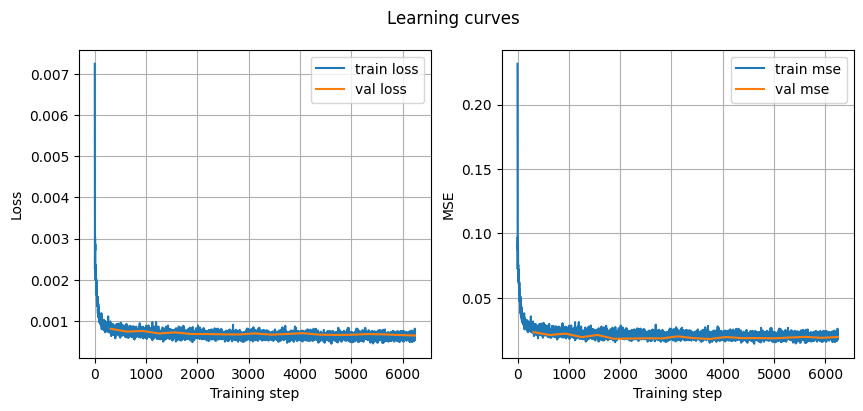

In [6]:
batch_size = 32
lr = 1e-2
epochs = 20

ae_model = Autoencoder(
    n_data_features=28 * 28,  # MNIST pixels
    n_encoder_hidden_features=128,  # chosen arbitrarily
    n_decoder_hidden_features=128,  # chosen arbitrarily
    n_latent_features=10,  # how many features will be used to represent input
)

train_dataloader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
    drop_last=True,
)
val_loader = DataLoader(
    val_dataset, batch_size=batch_size, shuffle=False, drop_last=False
)

loss_fn = nn.MSELoss()

_ = train_ae(
    ae_model,
    epochs=epochs,
    train_loader=train_dataloader,
    val_loader=val_loader,
    lr=lr,
    loss_fn=loss_fn,
)


# Analiza Wyników

Poniżej znajdują się wywołania analiz działania modelu: porównanie rekonstrukcji z obrazami wejściowymi, uśrednione punkty reprezentujące każdą klasę, badanie zdolności generatywnych modelu przez modyfikowanie wektora ukrytego oraz wizualizację przestrzeni ukrytej.


In [7]:
analyzer = AutoEncoderAnalyzer(model=ae_model, dataset=val_dataset, n_samplings=1)

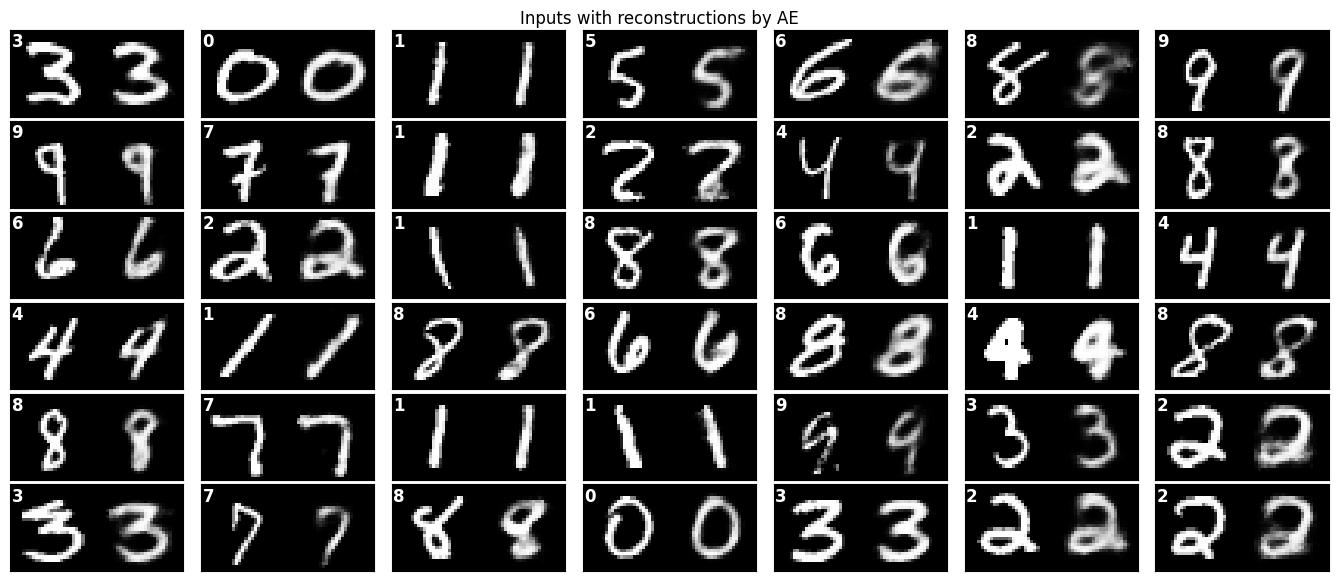

In [8]:
analyzer.compare_reconstruction_with_original()
plt.show()

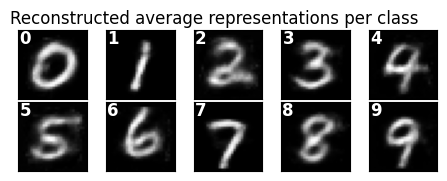

In [9]:
analyzer.average_points_per_class()
plt.show()

Digit: 0
Researching values in range [-10.0, 17.0]


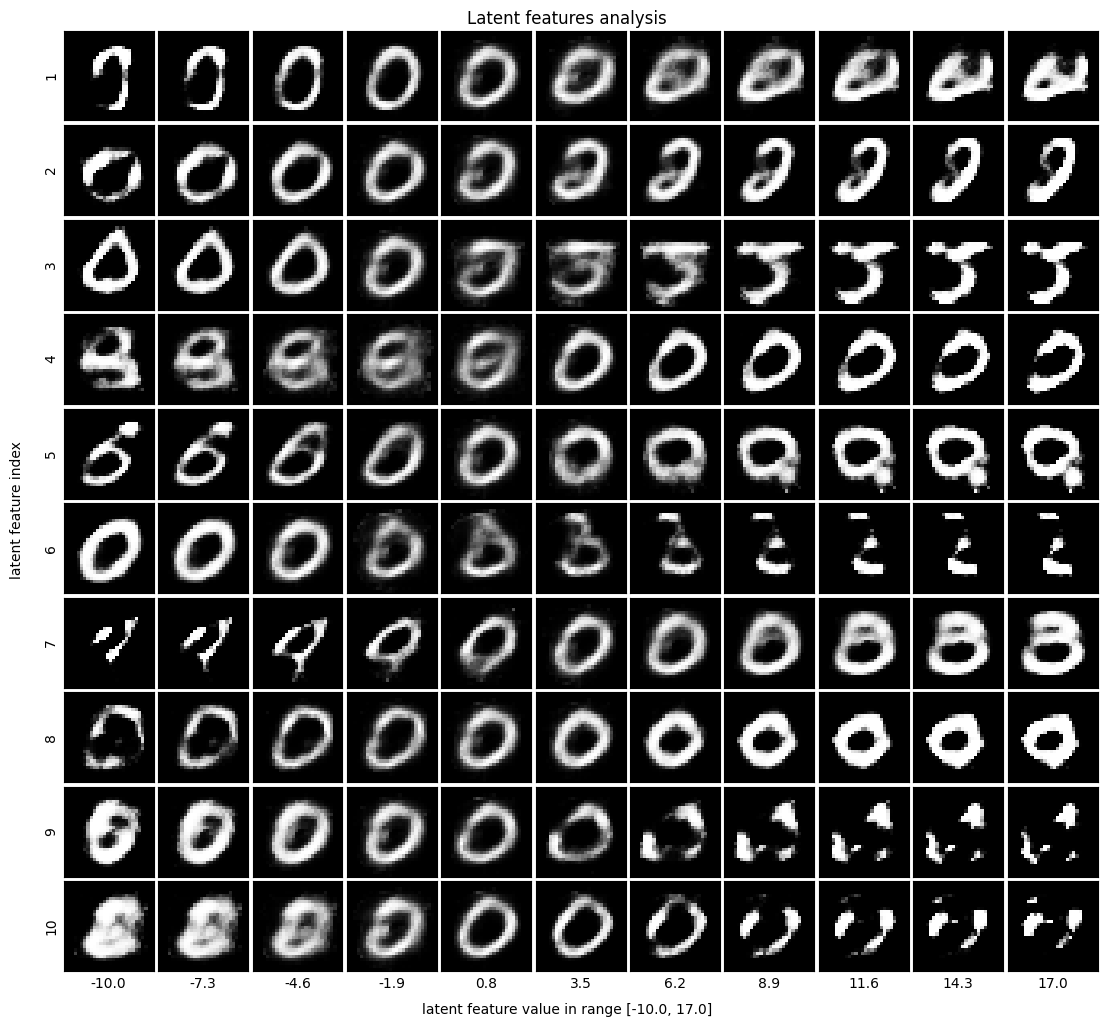

Digit: 1
Researching values in range [-10.0, 17.0]


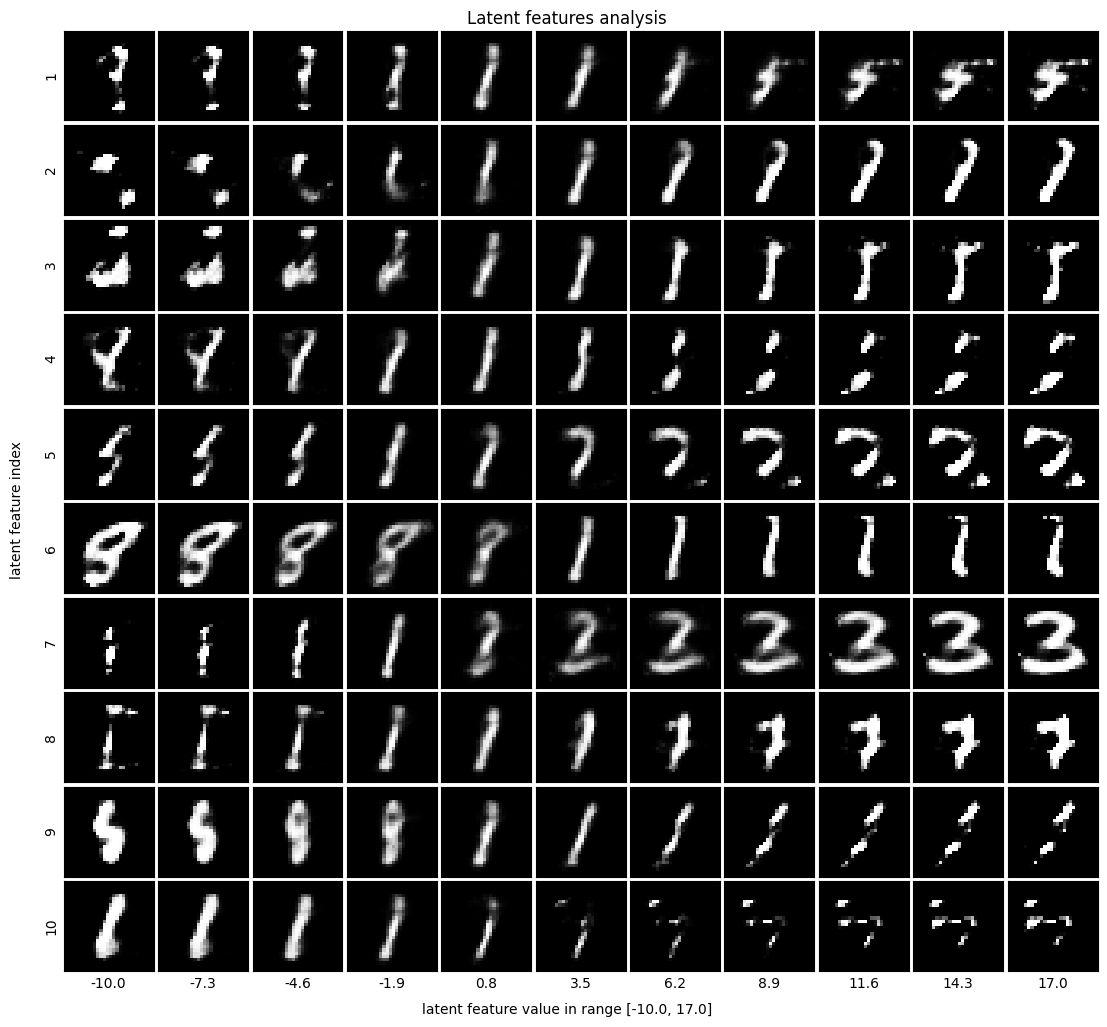

Digit: 2
Researching values in range [-10.0, 17.0]


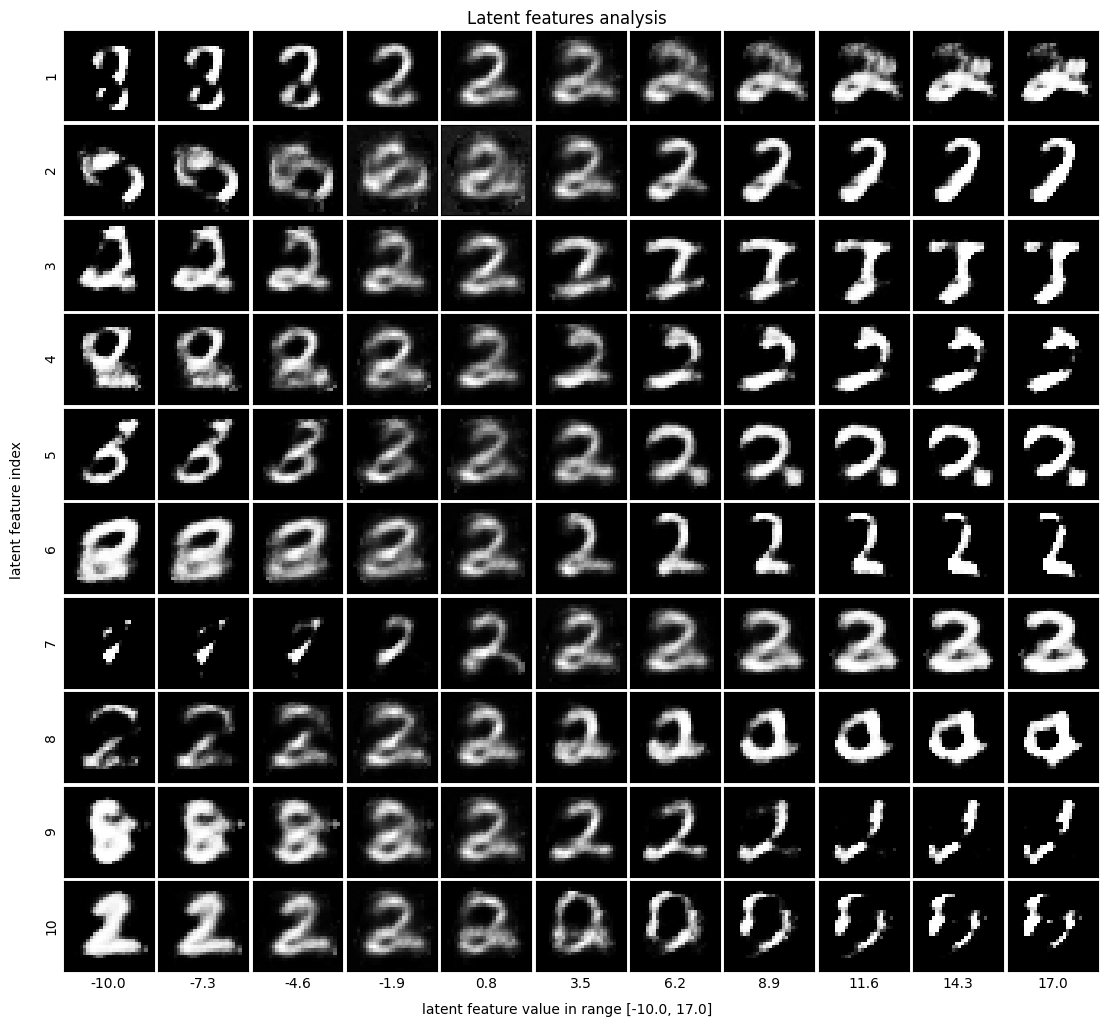

Digit: 3
Researching values in range [-10.0, 17.0]


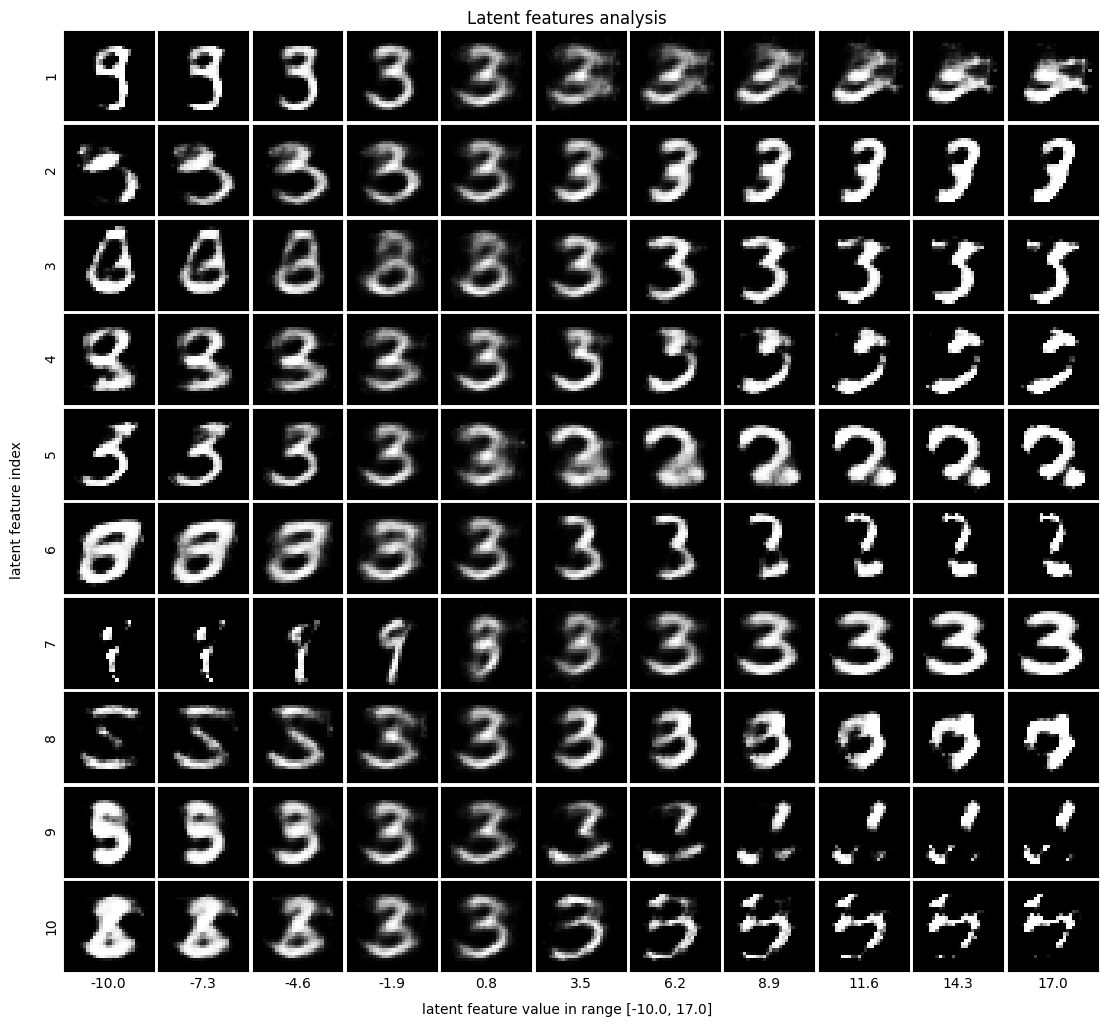

Digit: 4
Researching values in range [-10.0, 17.0]


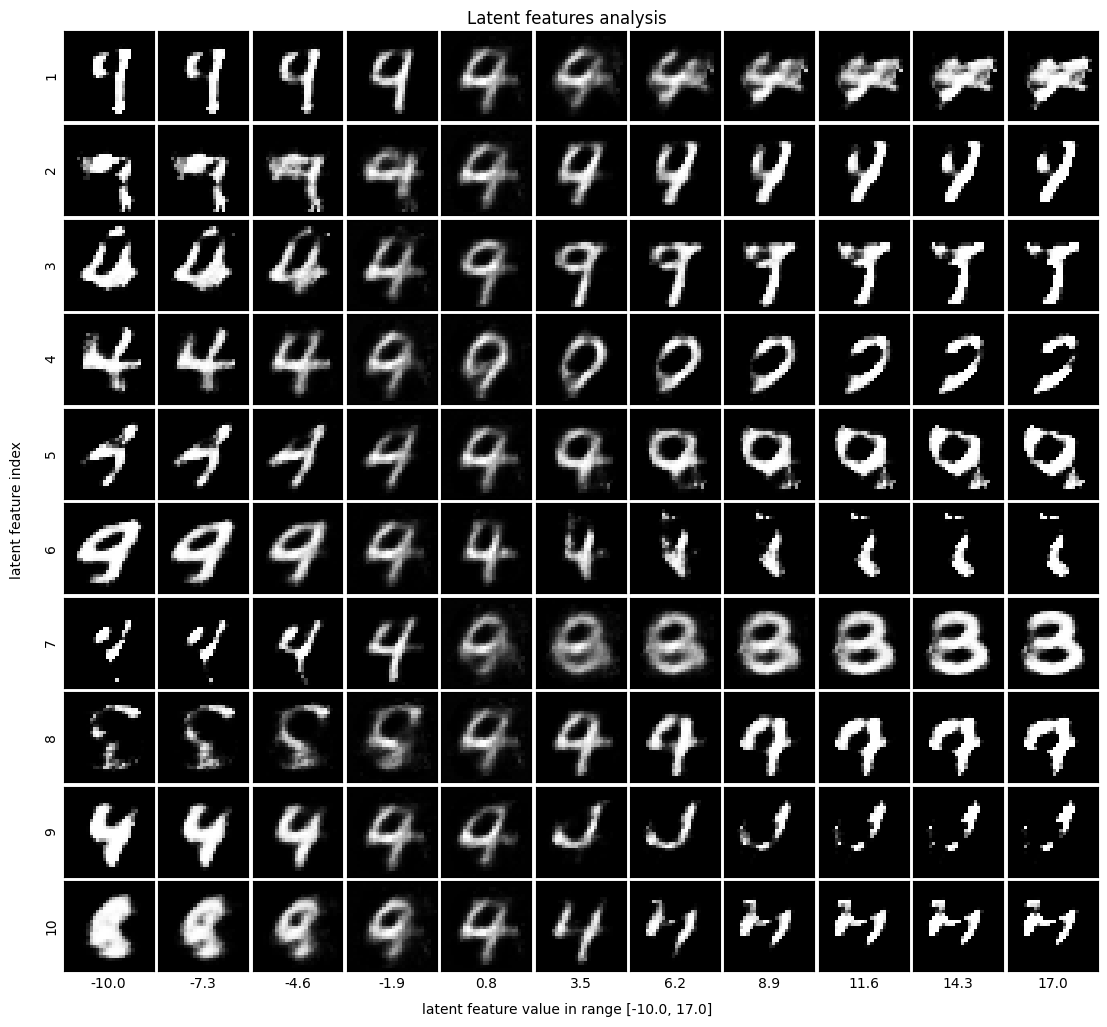

Digit: 5
Researching values in range [-10.0, 17.0]


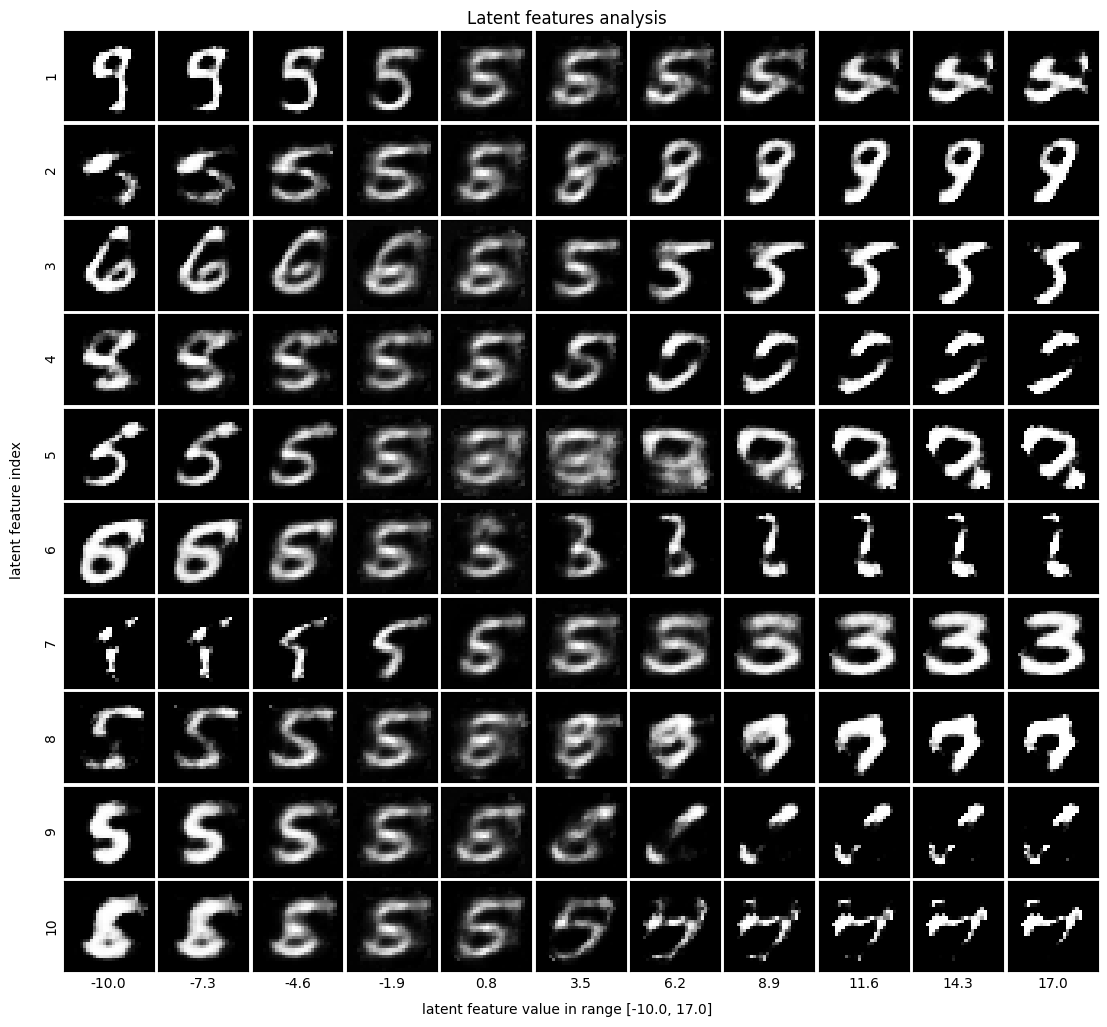

Digit: 6
Researching values in range [-10.0, 17.0]


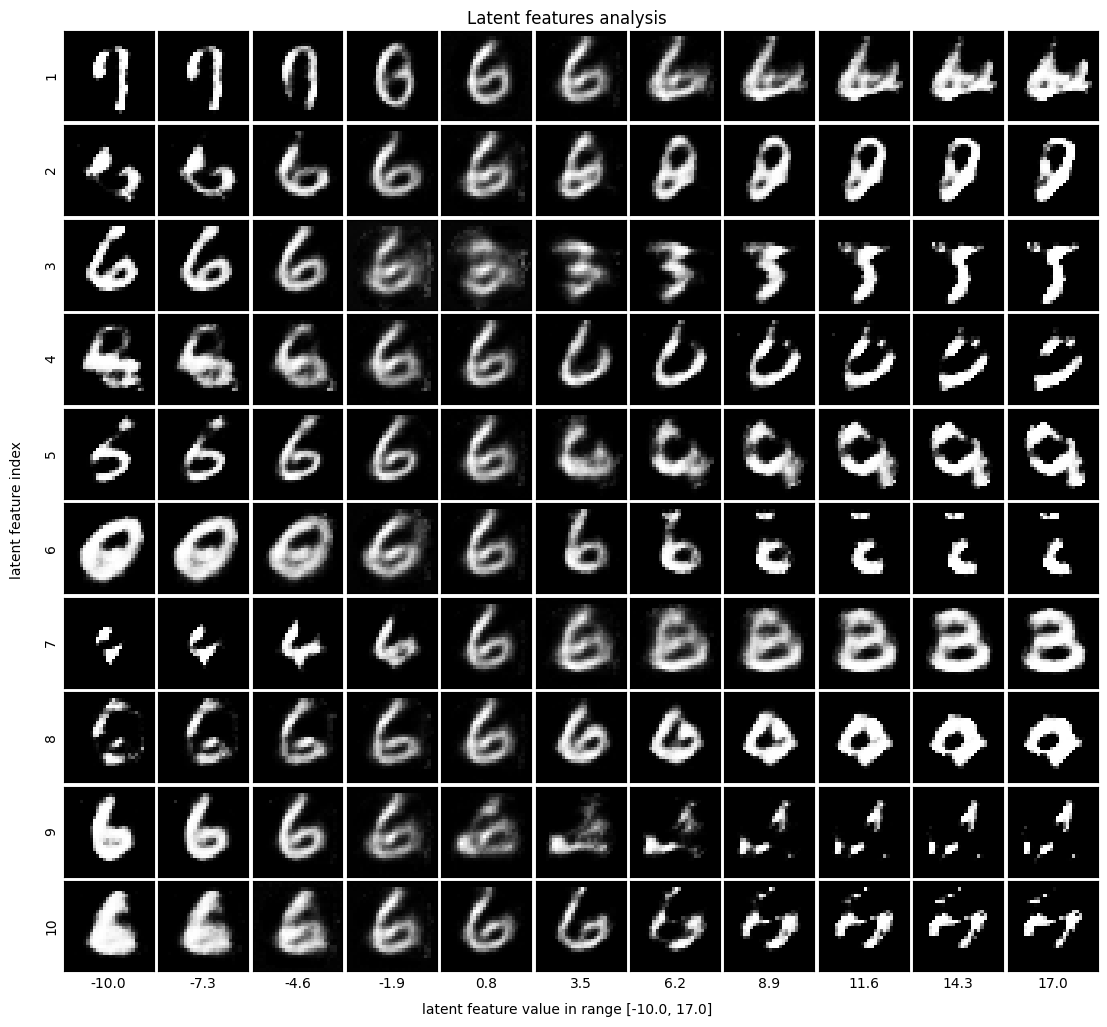

Digit: 7
Researching values in range [-10.0, 17.0]


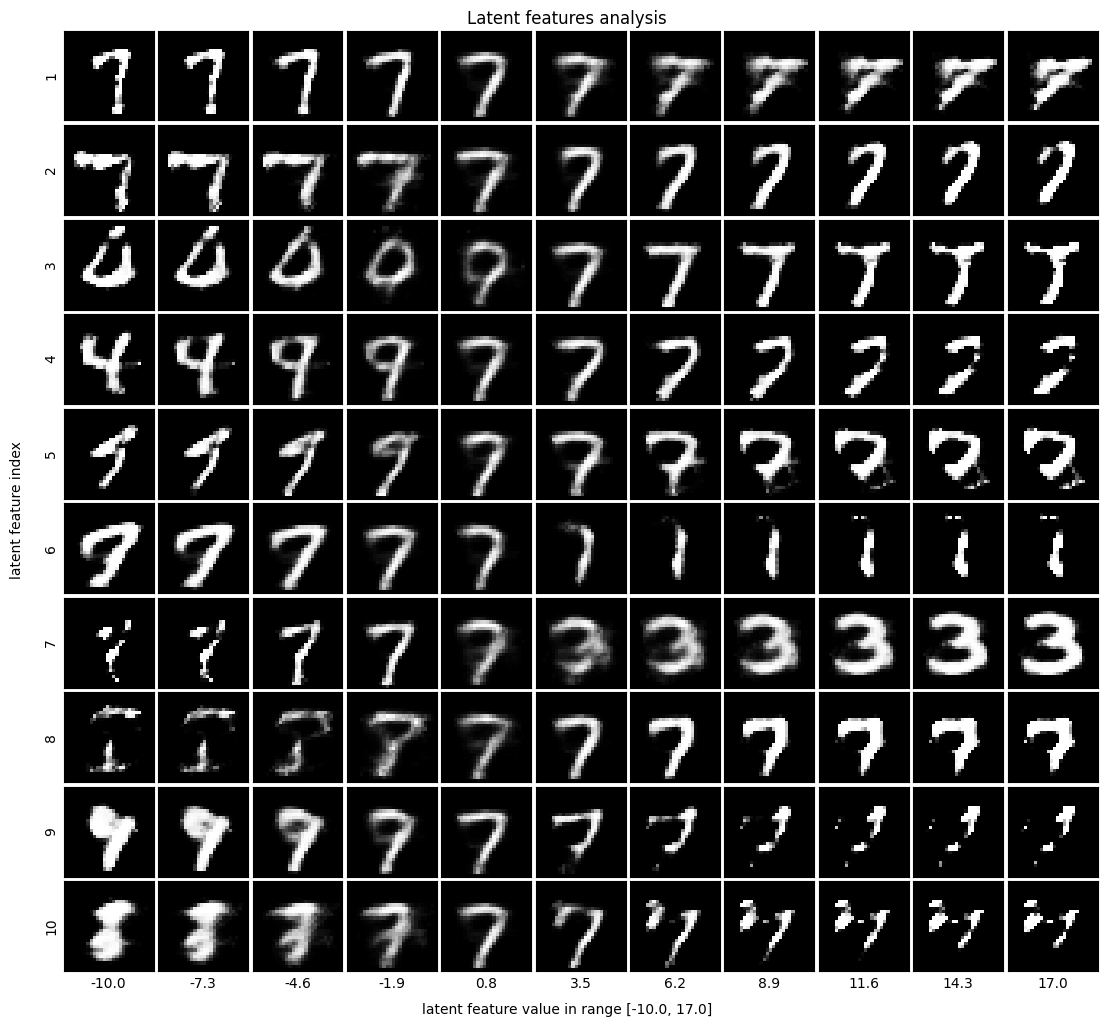

Digit: 8
Researching values in range [-10.0, 17.0]


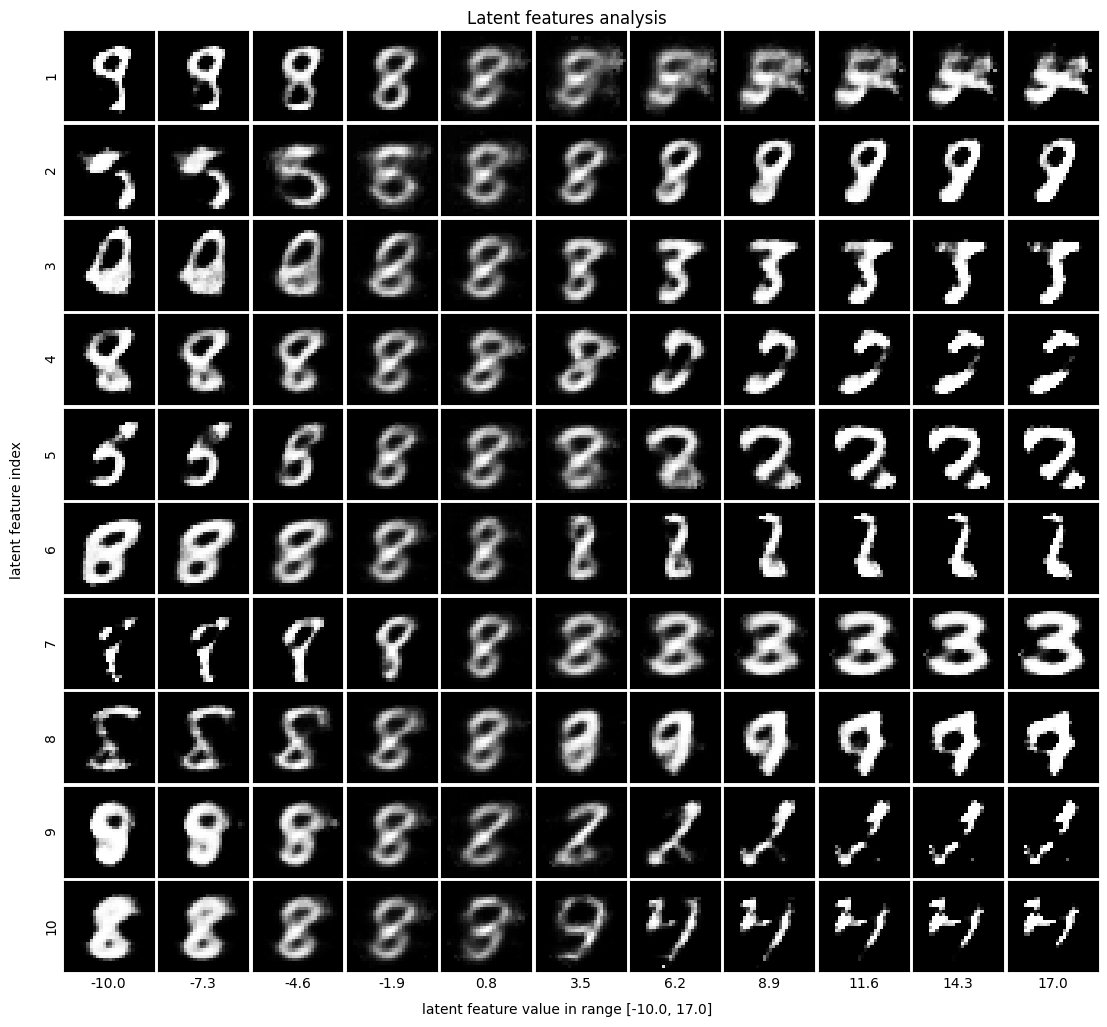

Digit: 9
Researching values in range [-10.0, 17.0]


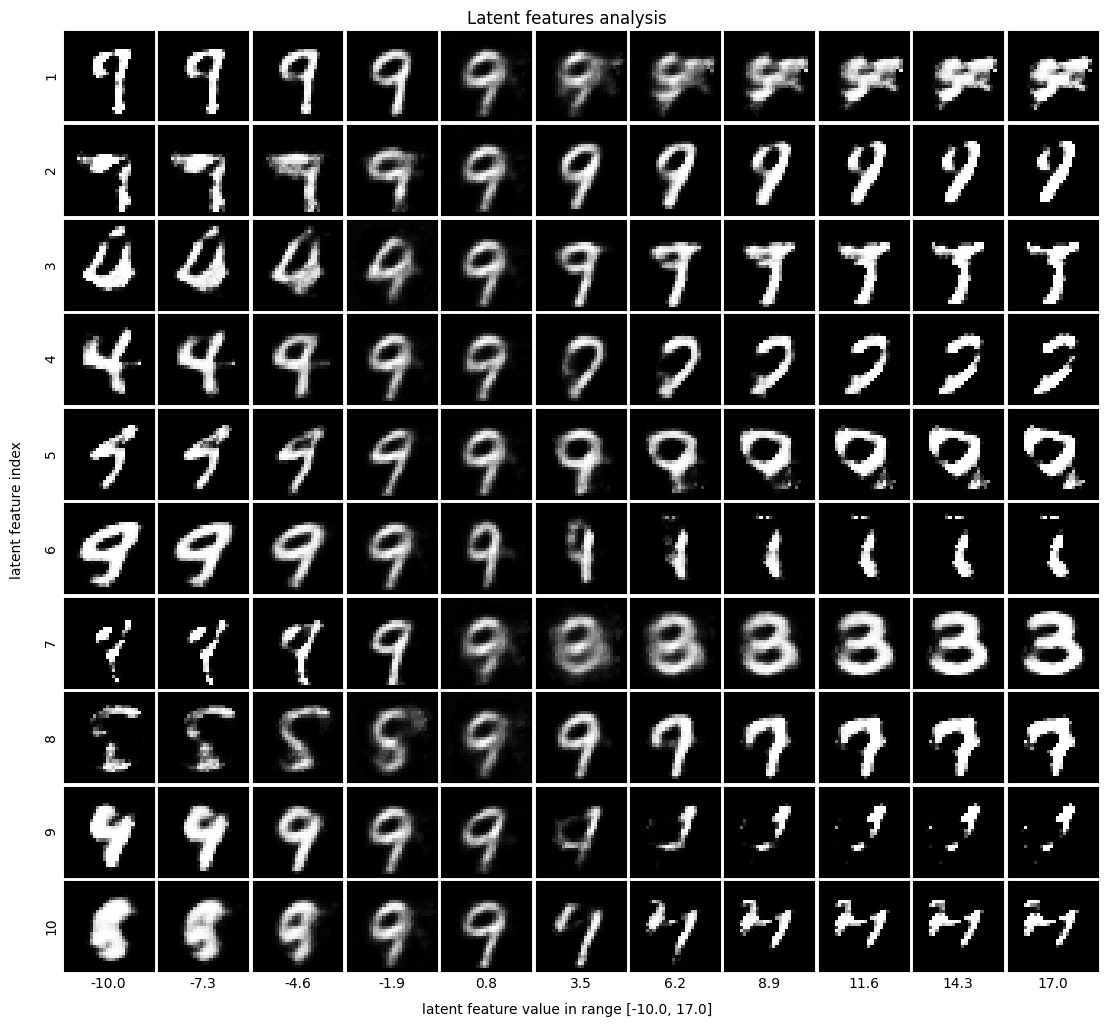

In [10]:
for digit, latent_code in enumerate(analyzer._averages):
    print(f"Digit: {digit}")
    analyzer.analyze_features(latent_code, steps=11)
    plt.show()

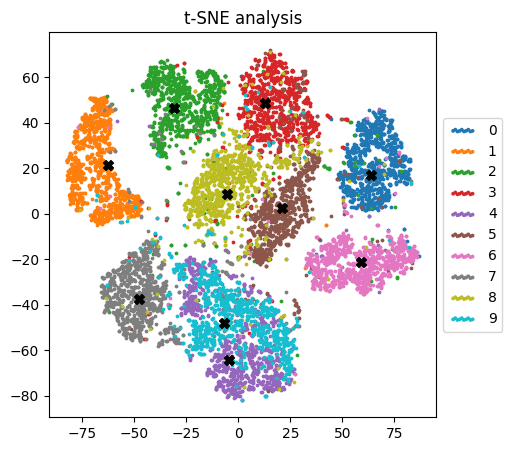

In [11]:
analyzer.analyze_tsne()  # this may take quite a long time
plt.show()

Do wytrenowania modelu VAE wykorzystamy bibliotekę Pyro. Funkcja ta dostarcza gotową implementację funkcji kosztu ELBO oraz metody SVI wykorzystywanej do trenowania modelu. Detale implementacyjne znajdują się w przygotowanej funkcji `train_ae`, którą wykorzystywaliśmy też wcześniej do trenowania modelu autokodera. Pyro wymaga od nas przygotowania funkcji `model` oraz `guide`. Pierwszy z nich ma definiować model generatywny $p_\theta(\mathbf{x} | \mathbf{z})p_\theta(\mathbf{z})$, drugi natomiast odpowiada za definicję aproksymacji posteriora $q_\phi(\mathbf{z} | \mathbf{x})$. Z nimi możemy wykorzystać klasę `Trace_ELBO`, która posłuży jako funkcja kosztu. Zachęcamy do zapoznania się z [dokumentacją](https://pyro.ai/examples/svi_part_i.html), gdzie znajduje się więcej informacji na temat `model`u oraz `guide`'a w bibliotece Pyro.

# Zadanie 1a (1.5 pkt.)

Wzorując się na implementacji klasycznego autokodera, zaimplementuj model autokodera wariacyjnego:

1. Przygotuj lub wykorzystaj już przygotowane implementacje kodera oraz dekodera:
    * Zadaniem kodera jest przetworzenie wejścia (obrazu) do parametrów rozkładu (w przypadku rozkładu normalnego: średniej i wariancji). Najczęściej parametry te tworzy się w ostatniej warstwie, używając wspólnych wcześniejszych warstw. Zwróć uwagę na zastosowanie odpowiednich funkcji aktywacji: tak, aby nie ograniczać niepotrzebnie zakresu wartości, ale również by nie uzyskać wartości nieprawidłowych.
    * Zadaniem dekodera jest przetworzenie ukrytej reprezentacji (próbki z rozkładu) w celu wygenerowania rekonstrukcji. Zakładamy, że próbkowanie odbywa się **poza** dekoderem. Zastosuj odpowiednią funkcję aktywacji na wyjściu, tak aby uzyskać wartości o odpowiednim zakresie.
2. Zaimplementuj klasę `VariationalAutoencoder`:
    * Zaimplementuj metodę `encoder_forward`, która dla danego wejścia wygeneruje jego ukrytą reprezentację. Wykorzystaj parametry rozkładu generowane przez koder oraz wykonaj w tej funkcji próbkowanie.
    * Zaimplementuj metodę `decoder_forward`, która dla danej ukrytej reprezentacji (wypróbkowanej z rozkładu) wygeneruje jego rekonstrukcję.

Zwróć uwagę, że w analizach doszło porównanie kilku próbek z rozkładu ukrytego modelu.


# Zadanie 1b (1.5 pkt.)

Zbadaj wpływ hiperparametrów modelu wariacyjnego autokodera (akie jak liczba neuronów w warstwach ukrytych, rozmiar ukrytej reprezentacji, współczynnik uczenia, itp.) na proces jego trenowania (szybkość, zdolność do wytrenowania, szybkość zbiegania itd.), uzyskiwane rezultaty oraz zdolności generatywne i właściwości przestrzeni ukrytej. Wykorzystaj przygotowaną klasę `AutoEncoderAnalyzer`. Zapisz wnioski w komórce Markdown.


In [12]:
class VEncoder(nn.Module):
    """Encoder for VAE."""

    def __init__(
        self,
        n_input_features: int,
        n_hidden_neurons: int,
        n_latent_features: int,
    ):
        """
        :param n_input_features: number of input features (28 x 28 = 784 for MNIST)
        :param n_hidden_neurons: number of neurons in hidden FC layer
        :param n_latent_features: size of the latent vector
        """
        super().__init__()

        self.input_to_hidden = nn.Linear(n_input_features, n_hidden_neurons)
        self.hidden_to_mu = nn.Linear(n_hidden_neurons, n_latent_features)
        self.hidden_to_log_var = nn.Linear(n_hidden_neurons, n_latent_features)

    def forward(self, x: torch.Tensor) -> Tuple[torch.Tensor, torch.Tensor]:
        """Encode data to Gaussian distribution parameters."""
        h = torch.relu(self.input_to_hidden(x))
        z_loc = self.hidden_to_mu(h)
        z_scale = torch.exp(0.5 * self.hidden_to_log_var(h))
        return z_loc, z_scale
    

class VDecoder(Decoder):
    def forward(self, z: torch.Tensor) -> torch.Tensor:
        return torch.sigmoid(super().forward(z))


class VariationalAutoencoder(BaseAutoEncoder):
    """Variational Auto Encoder model."""

    def __init__(
        self,
        n_data_features: int,
        n_encoder_hidden_features: int,
        n_decoder_hidden_features: int,
        n_latent_features: int,
    ):
        """
        :param n_data_features: number of input and output features (28 x 28 = 784 for MNIST)
        :param n_encoder_hidden_features: number of neurons in encoder's hidden layer
        :param n_decoder_hidden_features: number of neurons in decoder's hidden layer
        :param n_latent_features: number of latent features
        """
        encoder = VEncoder(
            n_input_features=n_data_features,
            n_hidden_neurons=n_encoder_hidden_features,
            n_latent_features=n_latent_features,
        )
        decoder = VDecoder(
            n_latent_features=n_latent_features,
            n_hidden_neurons=n_decoder_hidden_features,
            n_output_features=n_data_features,
        )
        super().__init__(
            encoder=encoder, decoder=decoder, n_latent_features=n_latent_features
        )
        self.input_shape = None

    def encoder_forward(self, x: torch.Tensor) -> torch.Tensor:
        """Function to perform forward pass through encoder network.
        takes: tensor of shape [batch_size x [image-size]] (input images batch)
        returns: tensor of shape [batch_size x latent_feature_size] (latent vector)
        """
        z = None
        if self.input_shape is None:
            self.input_shape = x.shape[1:]
        x = x.view(x.shape[0], -1)
        mu, sigma = self.encoder(x)
        std = torch.exp(0.5 * sigma)
        eps = torch.randn_like(std)
        z = mu + eps * std
        return z

    def decoder_forward(self, z: torch.Tensor) -> torch.Tensor:
        """Function to perform forward pass through decoder network.
        takes: tensor of shape [batch_size x latent_feature_size] (latent vector)
        returns: tensor of shape [batch_size x [image-size]] (reconstructed images batch)
        """
        r = self.decoder(z)
        return r.view(-1, *self.input_shape)

    def model(self, x: torch.Tensor):
        """Pyro model for VAE; p(x|z)p(z)."""
        pyro.module("decoder", self.decoder)
        with pyro.plate("data", x.shape[0]):
            z_loc = torch.zeros((x.shape[0], self.n_latent_features))
            z_scale = torch.ones((x.shape[0], self.n_latent_features))
            z = pyro.sample("latent", dist.Normal(z_loc, z_scale).to_event(1))
            output = self.decoder.forward(z).view(-1, *self.input_shape)
            x = (x != 0).float()
            pyro.sample("obs", dist.Bernoulli(output).to_event(3), obs=x)

    def guide(self, x: torch.Tensor):
        """Pyro guide for VAE; q(z|x)"""
        pyro.module("encoder", self.encoder)
        with pyro.plate("data", x.shape[0]):
            z_loc, z_scale = self.encoder.forward(x.view(x.shape[0], -1))
            pyro.sample("latent", dist.Normal(z_loc, z_scale).to_event(1))


epoch: 100%|██████████| 20/20 [00:37<00:00,  1.90s/it]


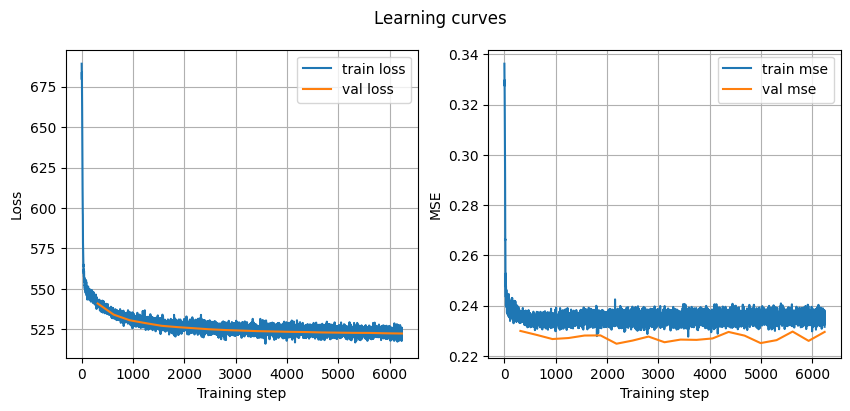

In [13]:
batch_size = 32
lr = 1e-3
epochs = 20

vae_model = VariationalAutoencoder(
    n_data_features=28 * 28,  # MNIST pixels
    n_encoder_hidden_features=128,  # chosen arbitrarily
    n_decoder_hidden_features=128,  # chosen arbitrarily
    n_latent_features=10,  # how many features will be used to represent input
)

train_dataloader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
    drop_last=True,
)
val_loader = DataLoader(
    val_dataset, batch_size=batch_size, shuffle=False, drop_last=False
)

loss_fn = pyro.infer.Trace_ELBO().differentiable_loss
loss_fn_args = (vae_model.model, vae_model.guide)

_ = train_ae(
    vae_model,
    epochs=epochs,
    train_loader=train_dataloader,
    val_loader=val_loader,
    lr=lr,
    loss_fn=loss_fn,
    loss_fn_args=loss_fn_args,
)

In [14]:
analyzer = AutoEncoderAnalyzer(model=vae_model, dataset=val_dataset, n_samplings=5)

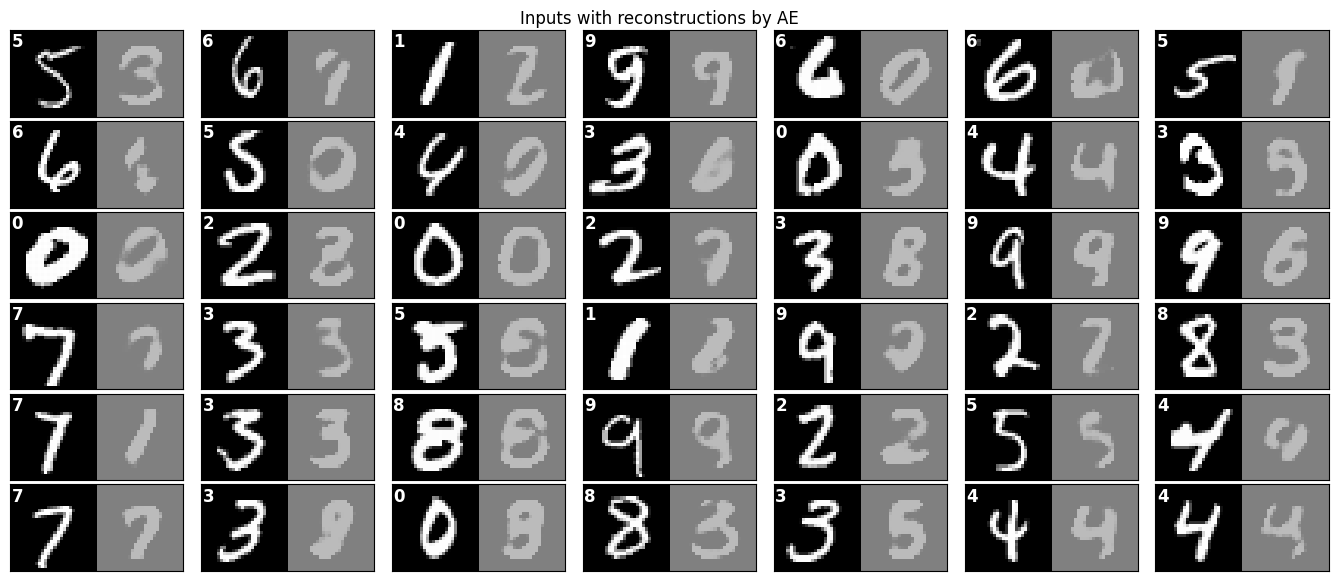

In [15]:
analyzer.compare_reconstruction_with_original()
plt.show()

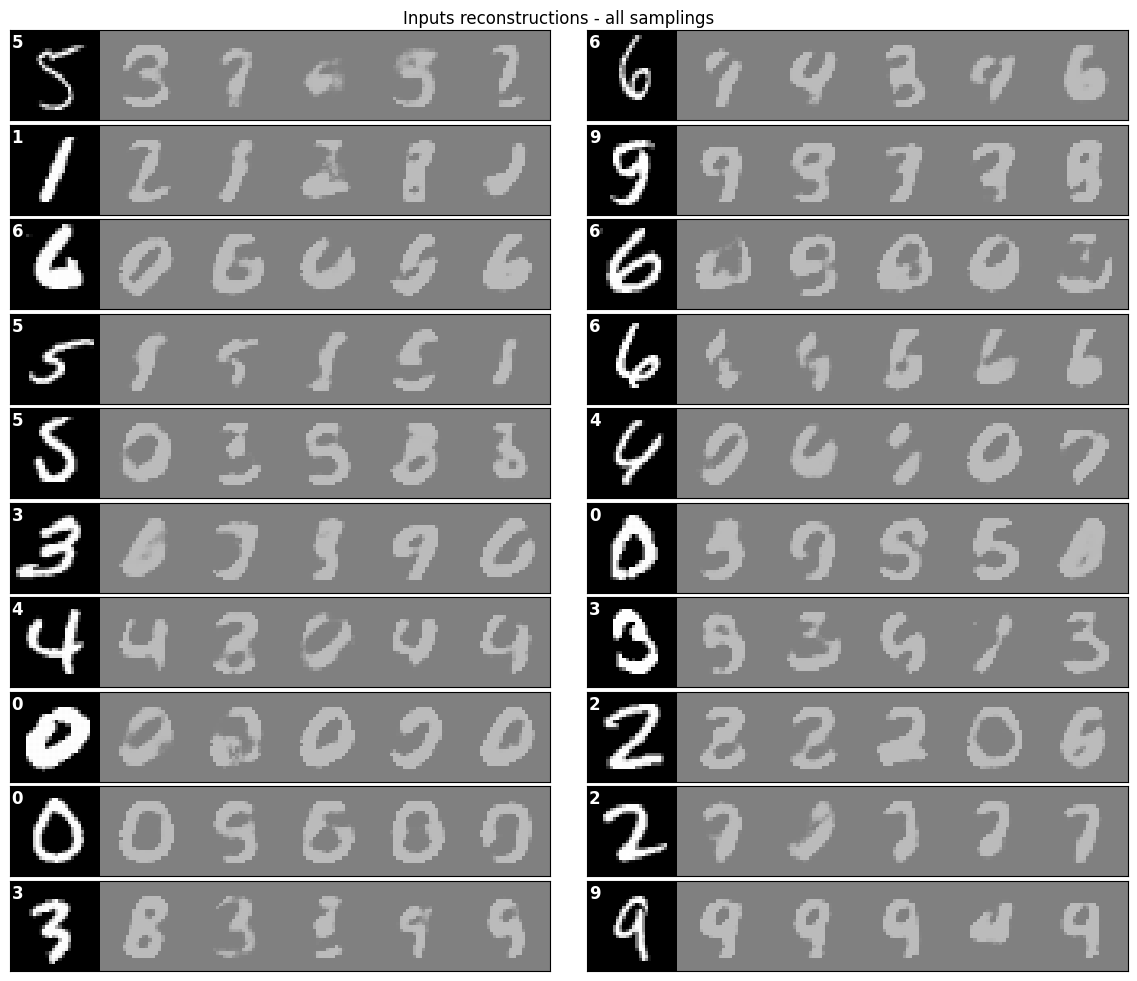

In [16]:
analyzer.compare_samplings()
plt.show()

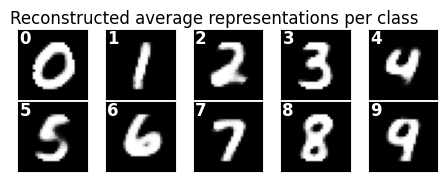

In [17]:
analyzer.average_points_per_class()
plt.show()

Digit: 0
Researching values in range [-8.0, 7.0]


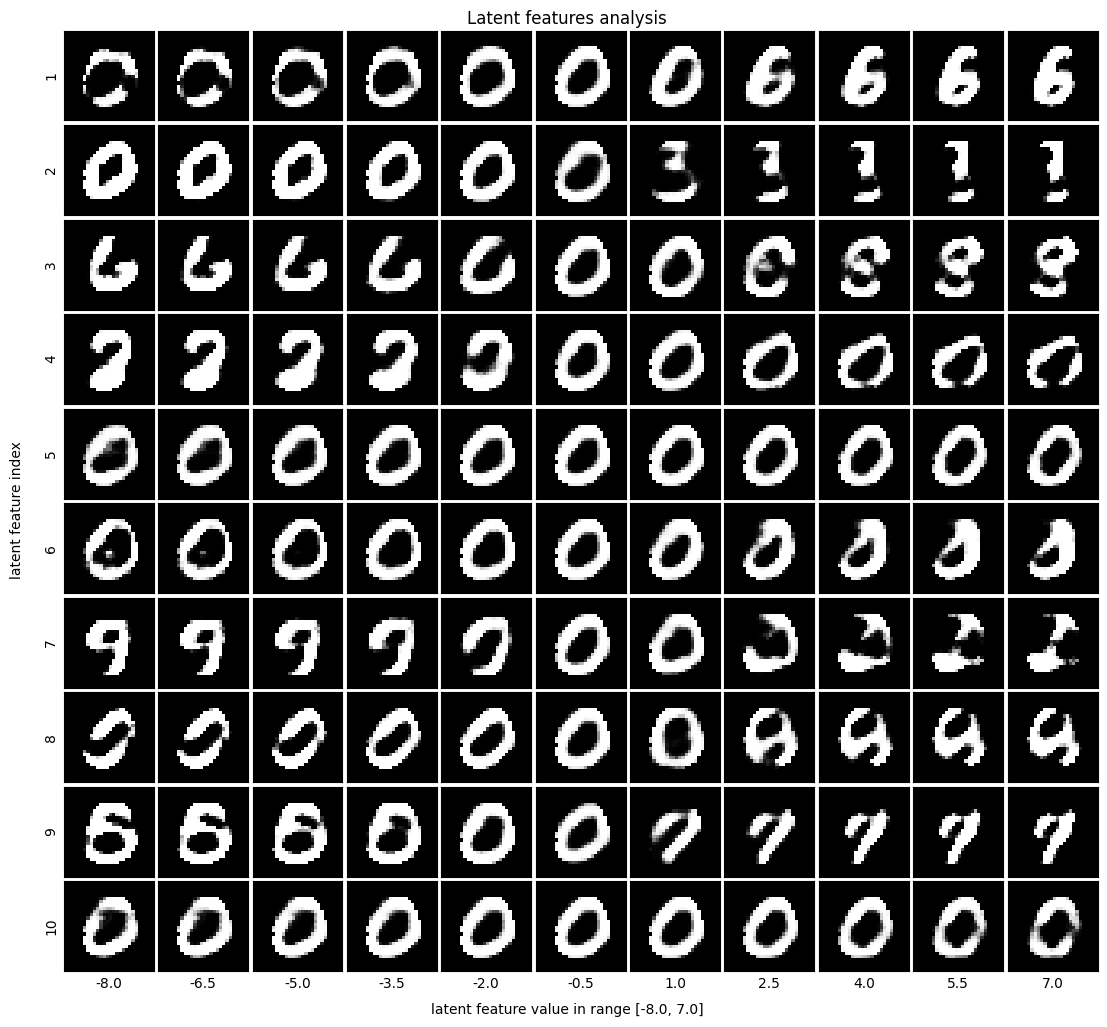

Digit: 1
Researching values in range [-8.0, 7.0]


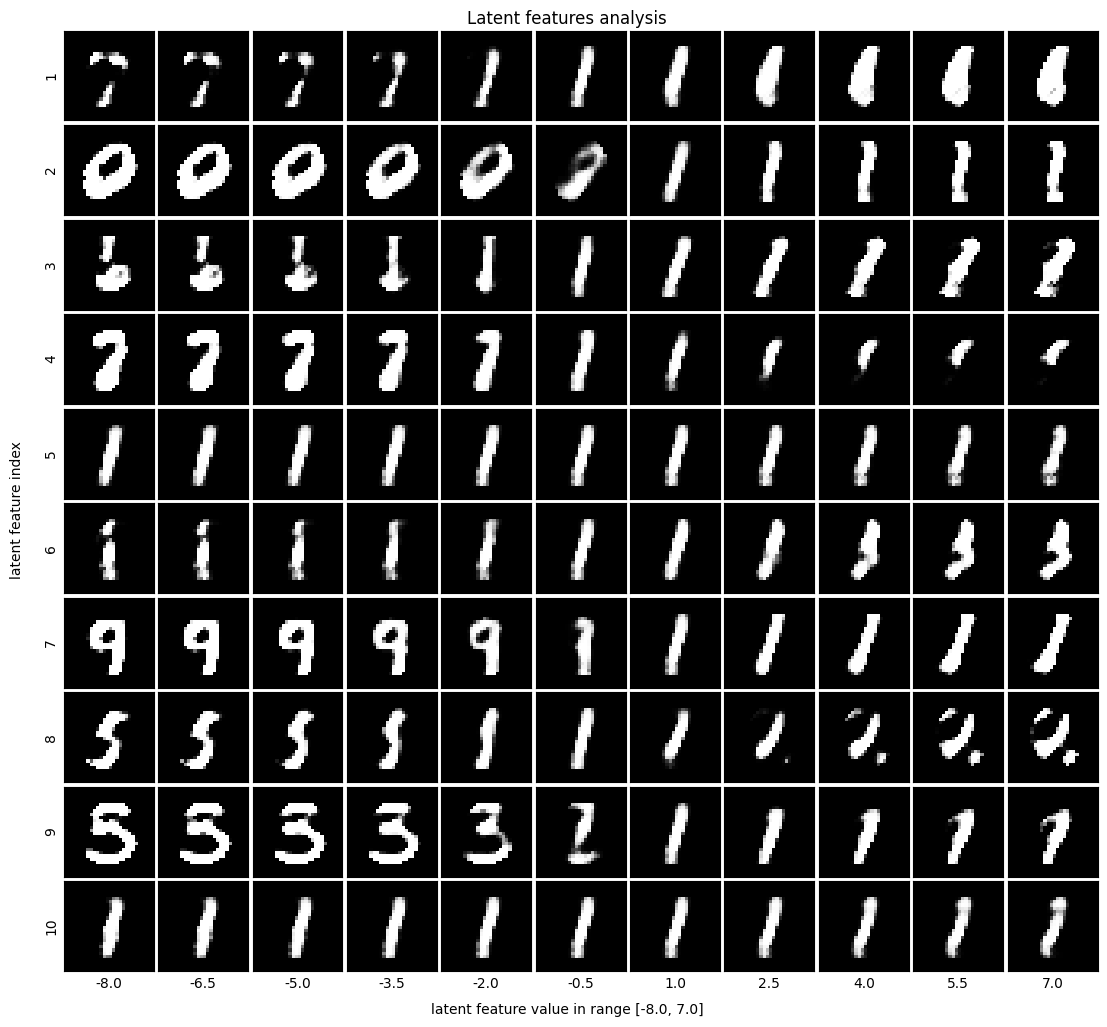

Digit: 2
Researching values in range [-8.0, 7.0]


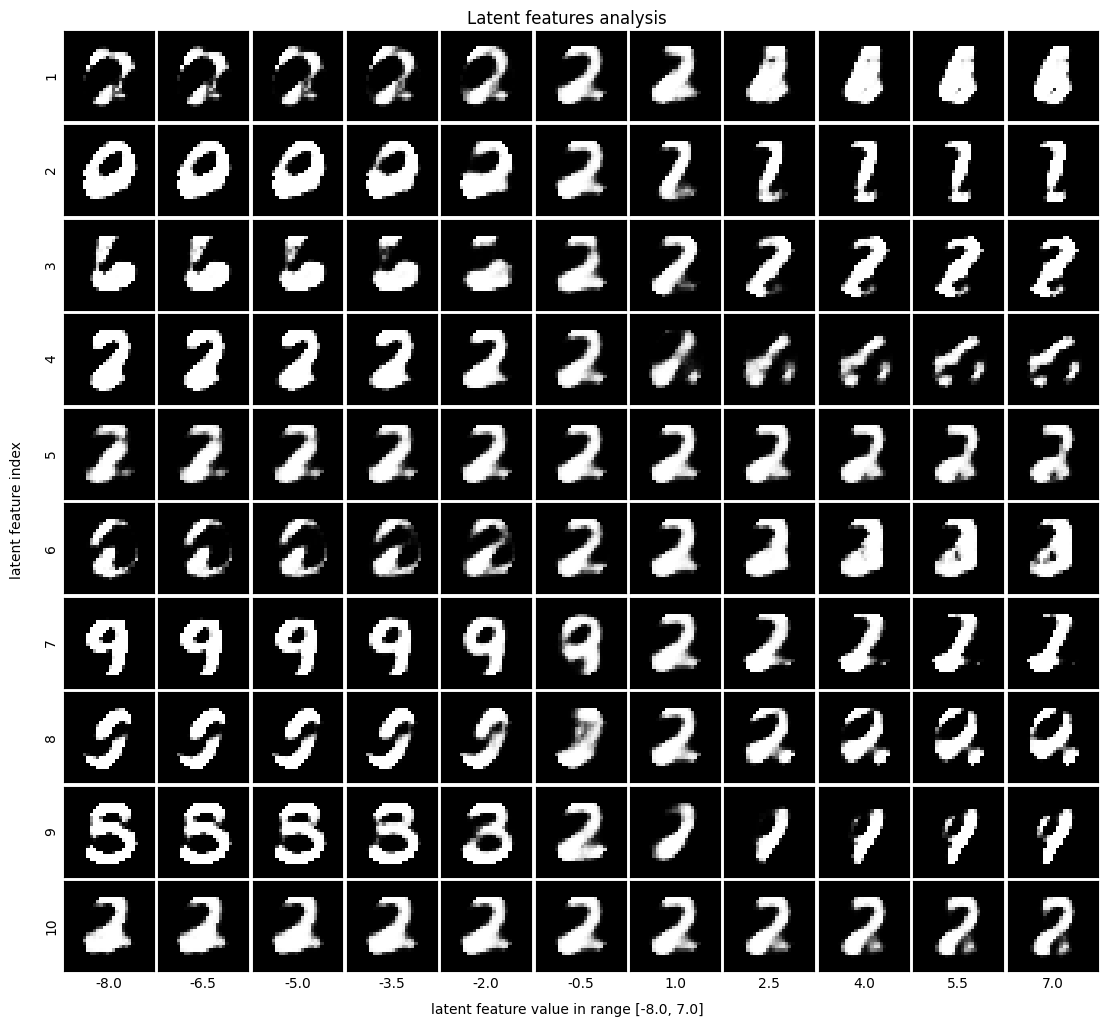

Digit: 3
Researching values in range [-8.0, 7.0]


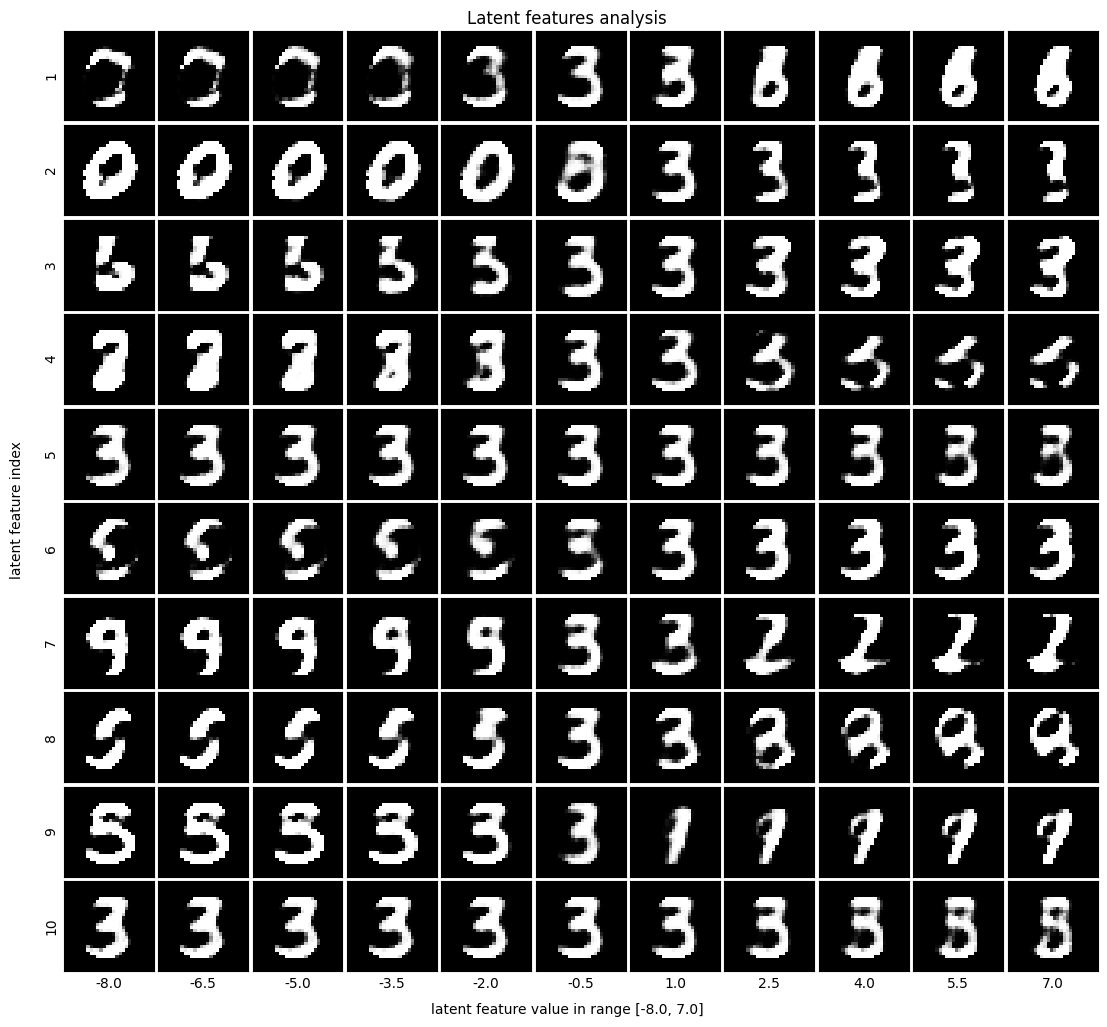

Digit: 4
Researching values in range [-8.0, 7.0]


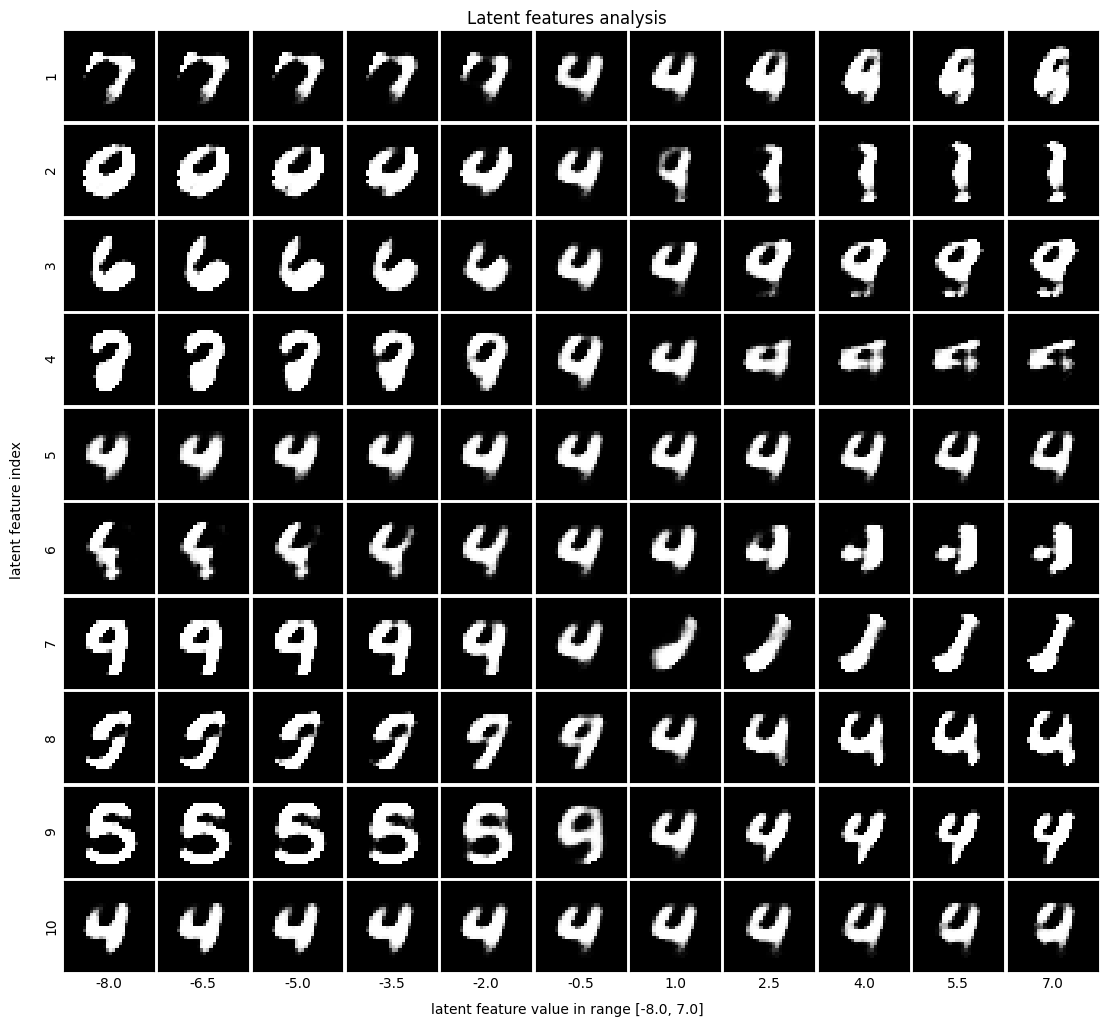

Digit: 5
Researching values in range [-8.0, 7.0]


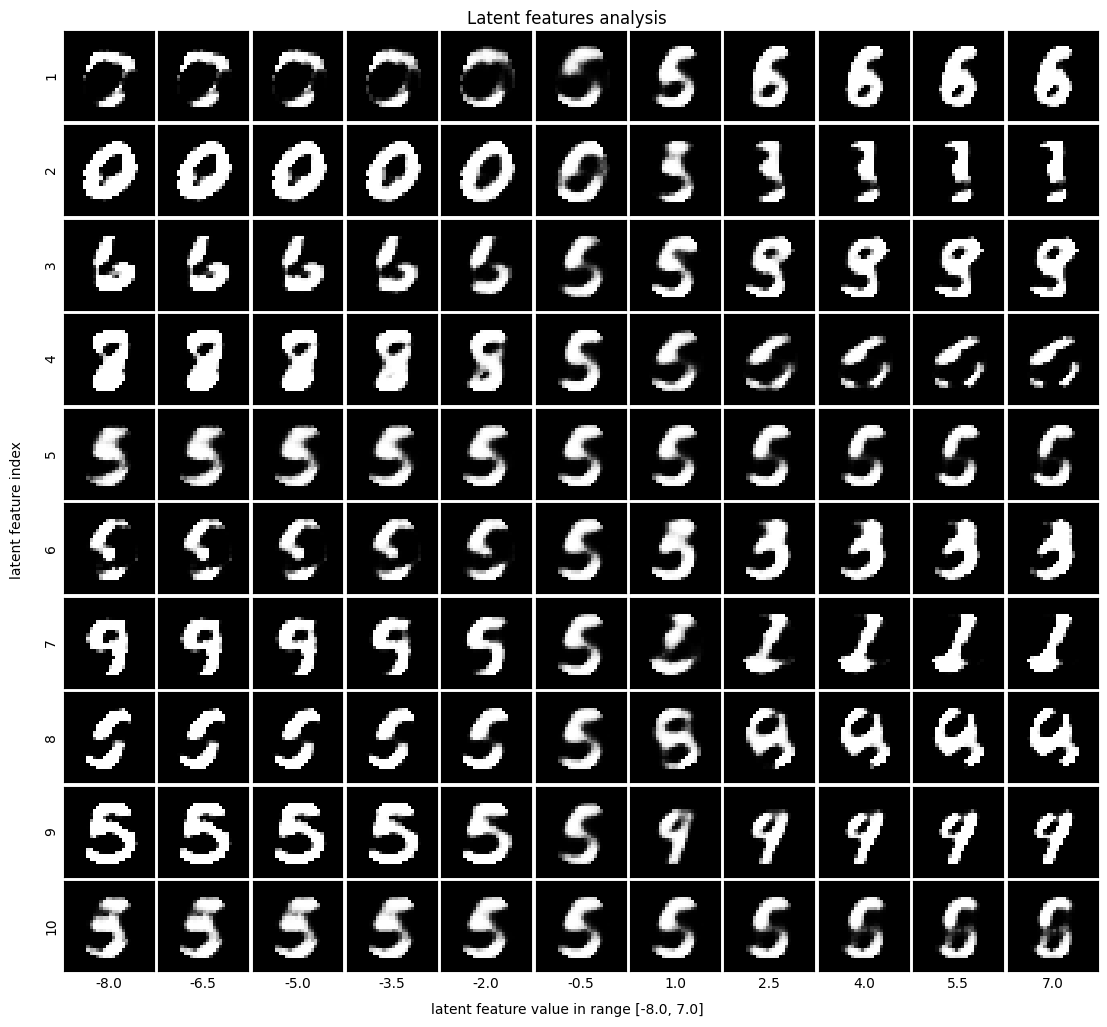

Digit: 6
Researching values in range [-8.0, 7.0]


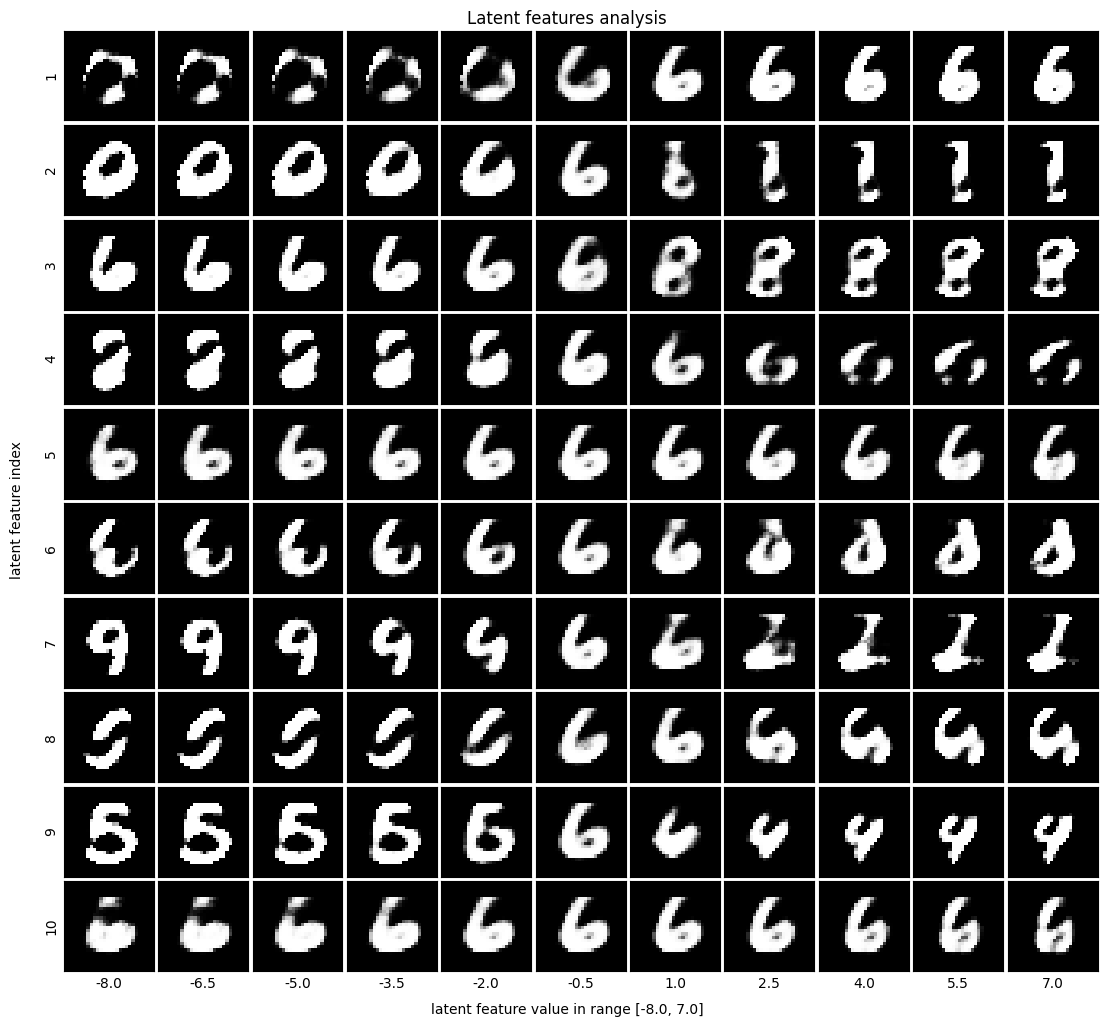

Digit: 7
Researching values in range [-8.0, 7.0]


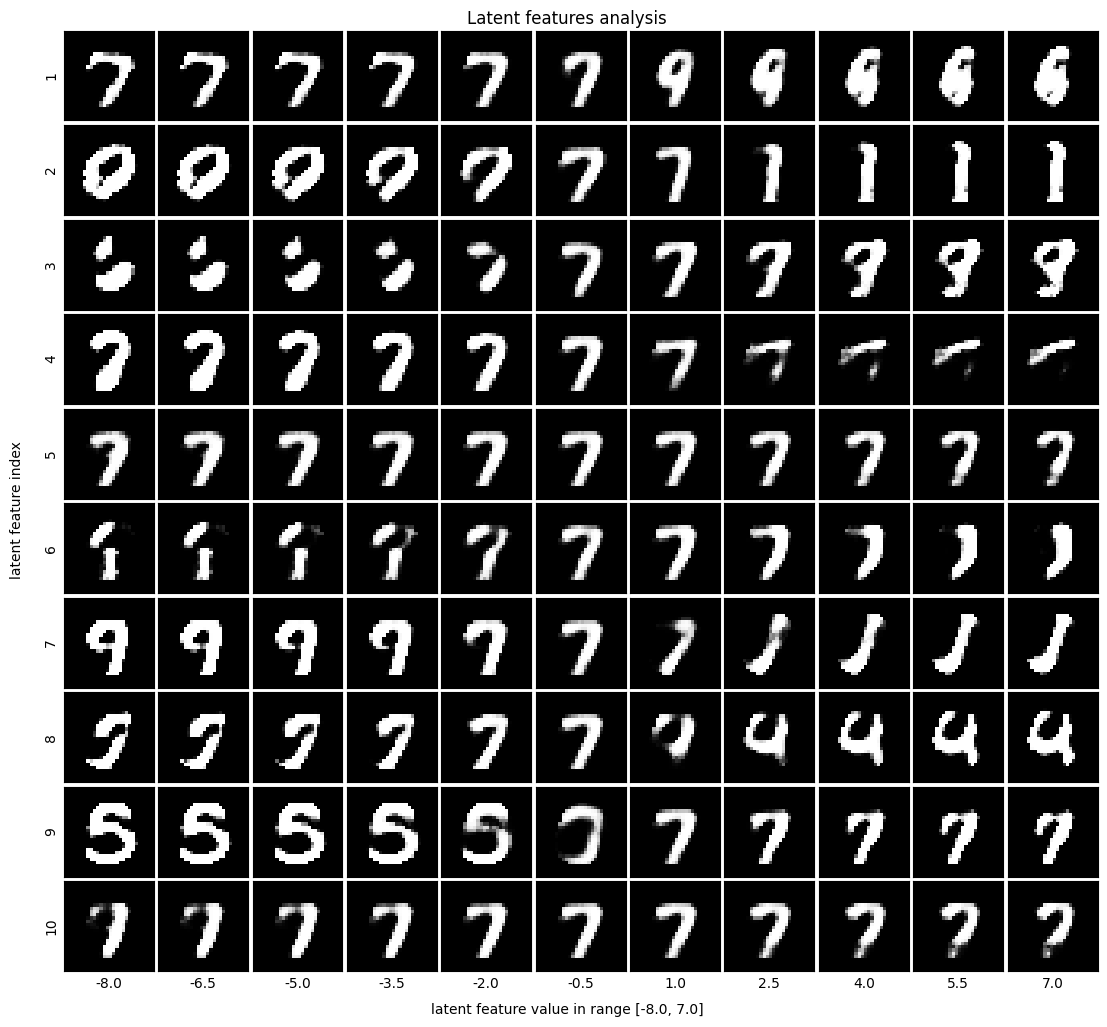

Digit: 8
Researching values in range [-8.0, 7.0]


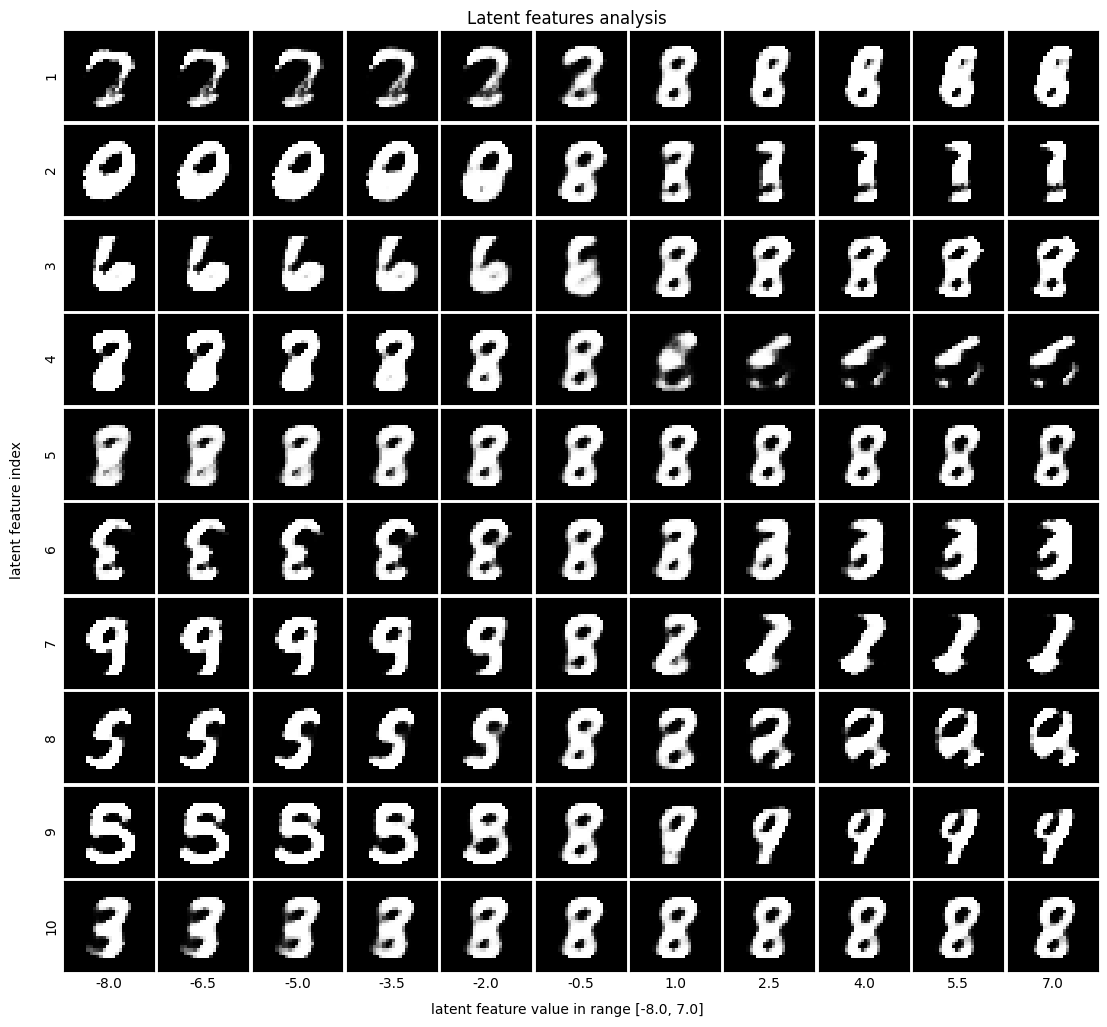

Digit: 9
Researching values in range [-8.0, 7.0]


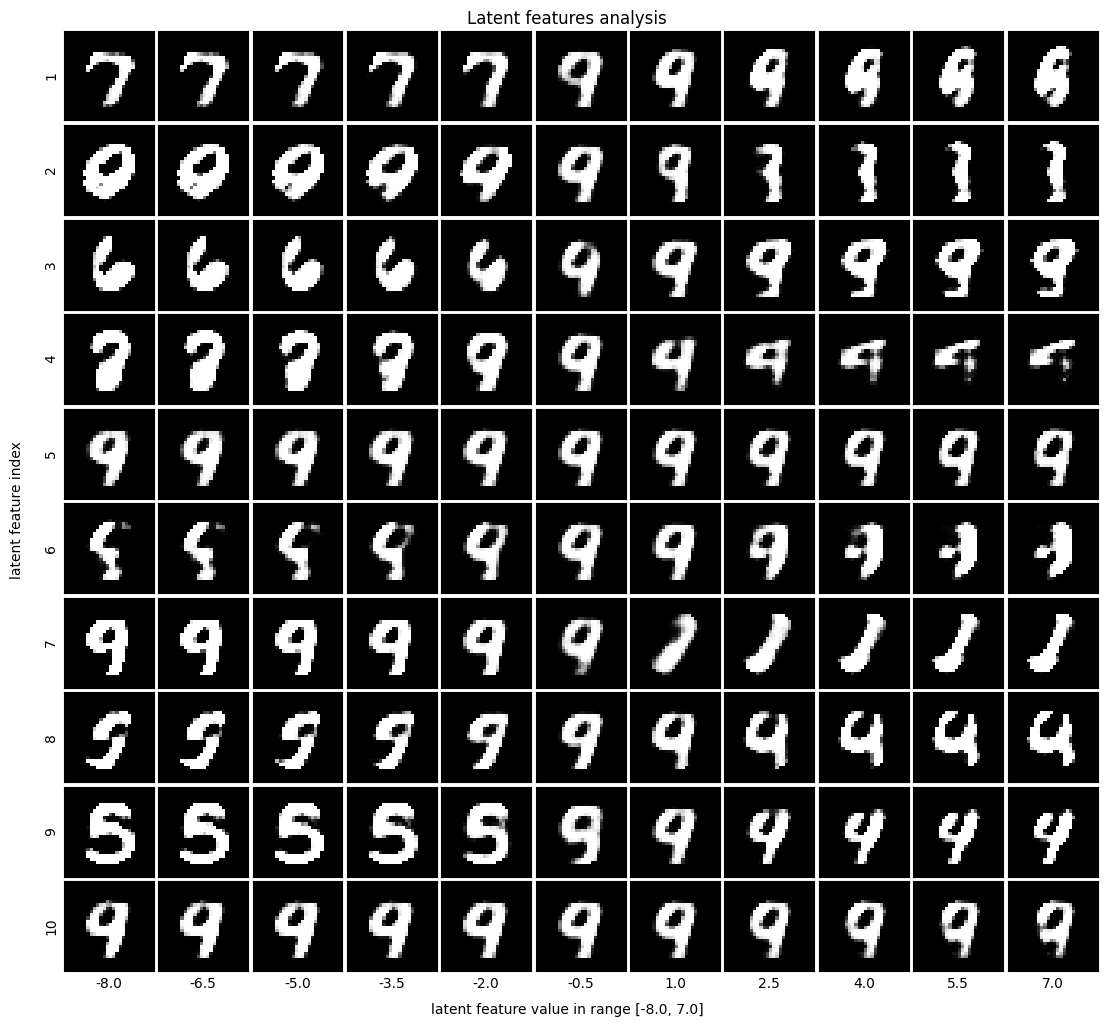

In [18]:
for digit, latent_code in enumerate(analyzer._averages):
    print(f"Digit: {digit}")
    analyzer.analyze_features(latent_code, steps=11)
    plt.show()

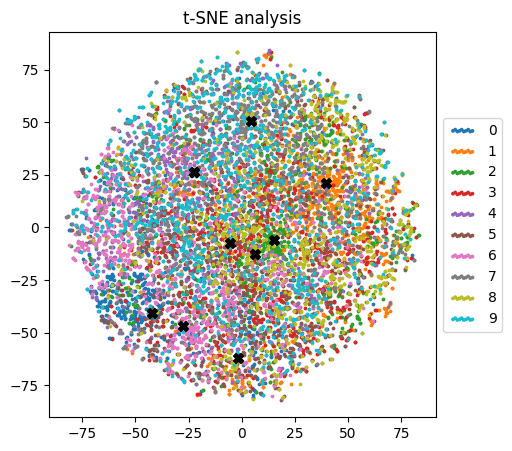

In [19]:
analyzer.analyze_tsne()  # this may take quite a long time
plt.show()

# Zadanie 2 (2 pkt.)

Metody uczenia reprezentacji, do których można zaliczyć autokoder wariacyjny, są często sprawdzane pod względem możliwości ich zastosowania w tzw. *downstream tasks*, czyli prostych zadaniach mających na celu weryfikację jakości utworzonej reprezentacji danych. Polegają one np. na wytrenowaniu modelu do jakiegoś zadania nie na danych, ale na ich reprezentacji, wytworzonej przez model uczenia reprezentacji. W tym przypadku tym zadaniem będzie klasyfikacja cyfr.

Wybierz dowolny klasyfikator (ważne: klasyfikator ten powinien osiągać **słabe** rezultaty dla zbioru MNIST). Zbadaj, jakie wartości metryk osiąga on przy zastosowaniu wprost na danych ze zbioru MNIST; sprawdź także ile czasu zajmuje trenowanie klasyfikatora oraz wnioskowanie.

Następnie zastosuj ten sam klasyfikator na ukrytych reprezentacjach wytworzonych przez oba modele autokodera: `Autoencoder` oraz `VariationalAutoencoder`, wytrenowane wcześniej (odpowiednio `ae_model` oraz `vae_model`). Przetwórz cały zbiór treningowy i walidacyjny z użyciem kodera w celu uzyskania ukrytych reprezentacji przykładów, a następnie wykorzystaj je do wytrenowania prostego klasyfikatora. Porównaj uzyskane metryki oraz szybkość działania.


In [20]:
data = {}

x, y = zip(*train_dataset)
x, y = torch.stack(x), torch.tensor(y)
data[('train', 'regular')] = (x.flatten(start_dim=1), y)
data[('train', 'AE reprezentation')] = (ae_model.encoder_forward(x), y)
data[('train', 'VAE reprezentation')] = (vae_model.encoder_forward(x), y)

x, y = zip(*val_dataset)
x, y = torch.stack(x), torch.tensor(y)
data[('val', 'regular')] = (x.flatten(start_dim=1), y)
data[('val', 'AE reprezentation')] = (ae_model.encoder_forward(x), y)
data[('val', 'VAE reprezentation')] = (vae_model.encoder_forward(x), y)

import pickle
with open('temp.pkl', 'wb+') as f: pickle.dump(data, f)

In [21]:
with open('temp.pkl', 'rb') as f: data = pickle.load(f)

In [22]:
class SimplePerceptron(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            # nn.ReLU(),
            # nn.Linear(hidden_size, 10),
            nn.Sigmoid())
    def forward(self, x):
        return self.model(x)

In [23]:
metrics = pd.DataFrame(columns=pd.MultiIndex.from_tuples(data.keys()))

for data_format in ['regular', 'AE reprezentation', 'VAE reprezentation']:
    print(f'Training model on data {data_format}')
    train_dl = DataLoader(TensorDataset(*data[('train', data_format)]), batch_size=16)
    val_dl = DataLoader(TensorDataset(*data[('val', data_format)]), batch_size=16)
    model = SimplePerceptron(data[('train', data_format)][0].shape[1], 10)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=1e-2)
    for epoch in range(10):
        for x, y in train_dl:
            outputs = model(x)
            loss = criterion(outputs, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    print(f'Training model on data {data_format} (train)')
    accuracy, f1 = 0, 0
    for x, y in train_dl:
        y = y.detach().numpy()
        pred = model(x).argmax(dim=1).detach().numpy()
        accuracy += accuracy_score(y, pred)
        f1 += f1_score(y, pred, average='weighted')
    metrics.loc['accuracy', ('train', data_format)] = accuracy / len(train_dl)
    metrics.loc['f1', ('train', data_format)] = f1 / len(train_dl)
    print(f'Training model on data {data_format} (val)')
    accuracy, f1 = 0, 0
    for x, y in val_dl:
        y = y.detach().numpy()
        pred = model(x).argmax(dim=1).detach().numpy()
        accuracy += accuracy_score(y, pred)
        f1 += f1_score(y, pred, average='weighted')
    metrics.loc['accuracy', ('val', data_format)] = accuracy / len(val_dl)
    metrics.loc['f1', ('val', data_format)] = f1 / len(val_dl)

metrics.style.format("{:.2%}")

Training model on data regular
Training model on data regular (train)
Training model on data regular (val)
Training model on data AE reprezentation
Training model on data AE reprezentation (train)
Training model on data AE reprezentation (val)
Training model on data VAE reprezentation
Training model on data VAE reprezentation (train)
Training model on data VAE reprezentation (val)


# Zadanie 3 (dodatkowe) (2 pkt.)

Jednym z fundamentalnych celów uczenia reprezentacji jest dążenie do uzyskania rozłącznych cech (co oznacza, że zmiana pojedynczego elementu wektora ukrytego spowoduje zmianę tylko jednej cechy obrazu wyjściowego). Poprzednie modele nie są w stanie uzyskać tego rezultatu - zmiana pojedynczego elementu wektora wpływa zazwyczaj na więcej niż jedną cechę obrazu wyjściowego.

Jedno z rozwiązań pozwalające na uzyskanie rozłącznych cech jest $\beta$-VAE. Zaproponowana modyfikacja polega na wprowadzeniu współczynnika regularyzacji $\beta$ do funkcji kosztu, dzięki któremu możemy regulować wpływ regularyzacji aproksymacji posteriora na rezultaty trenowania:

$$\log p_\theta \left(\mathbf{x}\right) \ge  \mathcal{L}\left(\mathbf{x}, \theta, \phi, \beta\right) = \underbrace{\mathbb{E}_{\mathbf{z}}\left[\log p_\theta\left(\mathbf{x} | \mathbf{z}\right)\right]}_{\text{błąd rekonstrukcji}} - \overbrace{\beta}^{\text{współczynnik regularyzacji}}\underbrace{\left(D_{KL}\left(q_\phi\left(\mathbf{z} | \mathbf{x}\right)\| p\left(\mathbf{z}\right)\right)\right)}_{\text{regularyzacja aproksymacji posteriora}}.$$

Publikacja: [link](https://openreview.net/references/pdf?id=Sy2fzU9gl)

Zadanie polega na implementacji modelu $\beta$-VAE. Wykorzystaj jak najwięcej komponentów klasy `VariationalAutoencoder`. Podpowiedź: należy zmodyfikować `model` oraz `guide`, wykorzystując narzędzia modyfikujące obliczanie score'ów (*effect handlers*) w Pyro: [Poutine](https://docs.pyro.ai/en/stable/poutine.html).  Przeanalizuj model z użyciem `AutoEncoderAnalyzer` - w szczególności pod względem uzyskiwanej reprezentacji ukrytej, zdolności generatywnych oraz wpływu zmian współczynnika $\beta$.


In [ ]:
class BetaVariationalAutoencoder(VariationalAutoencoder):
    """beta-Variational Auto Encoder model."""
    
    # TU WPISZ KOD
    raise NotImplementedError()


In [ ]:
batch_size = 32
lr = 1e-3
epochs = 20

bvae_model = BetaVariationalAutoencoder(
    n_data_features=28 * 28,  # MNIST pixels
    n_encoder_hidden_features=128,  # chosen arbitrarily
    n_decoder_hidden_features=128,  # chosen arbitrarily
    n_latent_features=10,  # how many features will be used to represent input
    beta=3.  # should limit the number of valuable features
)

train_dataloader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
    drop_last=True,
)
val_loader = DataLoader(
    val_dataset, batch_size=batch_size, shuffle=False, drop_last=False
)

loss_fn = pyro.infer.Trace_ELBO().differentiable_loss
loss_fn_args = (bvae_model.model, bvae_model.guide)

train_ae(
    bvae_model,
    epochs=epochs,
    train_loader=train_dataloader,
    val_loader=val_loader,
    lr=lr,
    loss_fn=loss_fn,
    loss_fn_args=loss_fn_args,
)


In [ ]:
analyzer = AutoEncoderAnalyzer(model=bvae_model, dataset=val_dataset, n_samplings=5)


In [ ]:
analyzer.compare_reconstruction_with_original()
plt.show()


In [ ]:
analyzer.compare_samplings()
plt.show()


In [ ]:
analyzer.average_points_per_class()
plt.show()


In [ ]:
for digit, latent_code in enumerate(analyzer._averages):
    print(f"Digit: {digit}")
    analyzer.analyze_features(latent_code, steps=11)
    plt.show()


In [ ]:
analyzer.analyze_tsne()  # this may take quite a long time
plt.show()
